In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.metrics import  recall_score, confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline

In [2]:
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv(r"C:\Users\Laman\Downloads\sensor_data.csv")
df

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0                0  2018-04-01 00:00:00   2.465394   47.09201  53.211800   
1                1  2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2                2  2018-04-01 00:02:00   2.444734   47.35243  53.211800   
3                3  2018-04-01 00:03:00   2.460474   47.09201  53.168400   
4                4  2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...            ...                  ...        ...        ...        ...   
220315      220315  2018-08-31 23:55:00   2.407350   47.69965  50.520830   
220316      220316  2018-08-31 23:56:00   2.400463   47.69965  50.564240   
220317      220317  2018-08-31 23:57:00   2.396528   47.69965  50.520830   
220318      220318  2018-08-31 23:58:00   2.406366   47.69965  50.520832   
220319      220319  2018-08-31 23:59:00   2.396528   47.69965  50.520832   

        sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  ...  \
0       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
1       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
2       46.397570  638.888900   73.54598   13.32465   16.03733  ...   
3       46.397568  628.125000   76.98898   13.31742   16.24711  ...   
4       46.397568  636.458300   76.58897   13.35359   16.21094  ...   
...           ...         ...        ...        ...        ...  ...   
220315  43.142361  634.722229   64.59095   15.11863   16.65220  ...   
220316  43.142361  630.902771   65.83363   15.15480   16.70284  ...   
220317  43.142361  625.925903   67.29445   15.08970   16.70284  ...   
220318  43.142361  635.648100   65.09175   15.11863   16.56539  ...   
220319  43.142361  639.814800   65.45634   15.11863   16.65220  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2        41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3        40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4        41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   
...           ...        ...        ...        ...        ...        ...   
220315   38.28125  68.287030   52.37268   48.32176  41.087960   212.3843   
220316   38.28125  66.840280   50.63657   48.03241  40.798610   213.8310   
220317   39.06250  65.393520   48.90046   48.03241  40.798610   217.3032   
220318   40.62500  64.236110   47.74306   48.32176  40.509258   222.5116   
220319   41.40625  62.789350   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
0        67.70834   243.0556   201.3889          NORMAL  
1        67.70834   243.0556   201.3889          NORMAL  
2        67.12963   241.3194   203.7037          NORMAL  
3        66.84028   240.4514   203.1250          NORMAL  
4        66.55093   242.1875   201.3889          NORMAL  
...           ...        ...        ...             ...  
220315  153.64580        NaN   231.1921          NORMAL  
220316  156.25000        NaN   231.1921          NORMAL  
220317  155.38190        NaN   232.0602          NORMAL  
220318  153.93520        NaN   234.0856          NORMAL  
220319  150.46300        NaN   234.0856          NORMAL  

[220320 rows x 55 columns]

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [5]:
print(df.shape)

(220320, 55)


In [6]:
print(df.isnull().sum())


Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

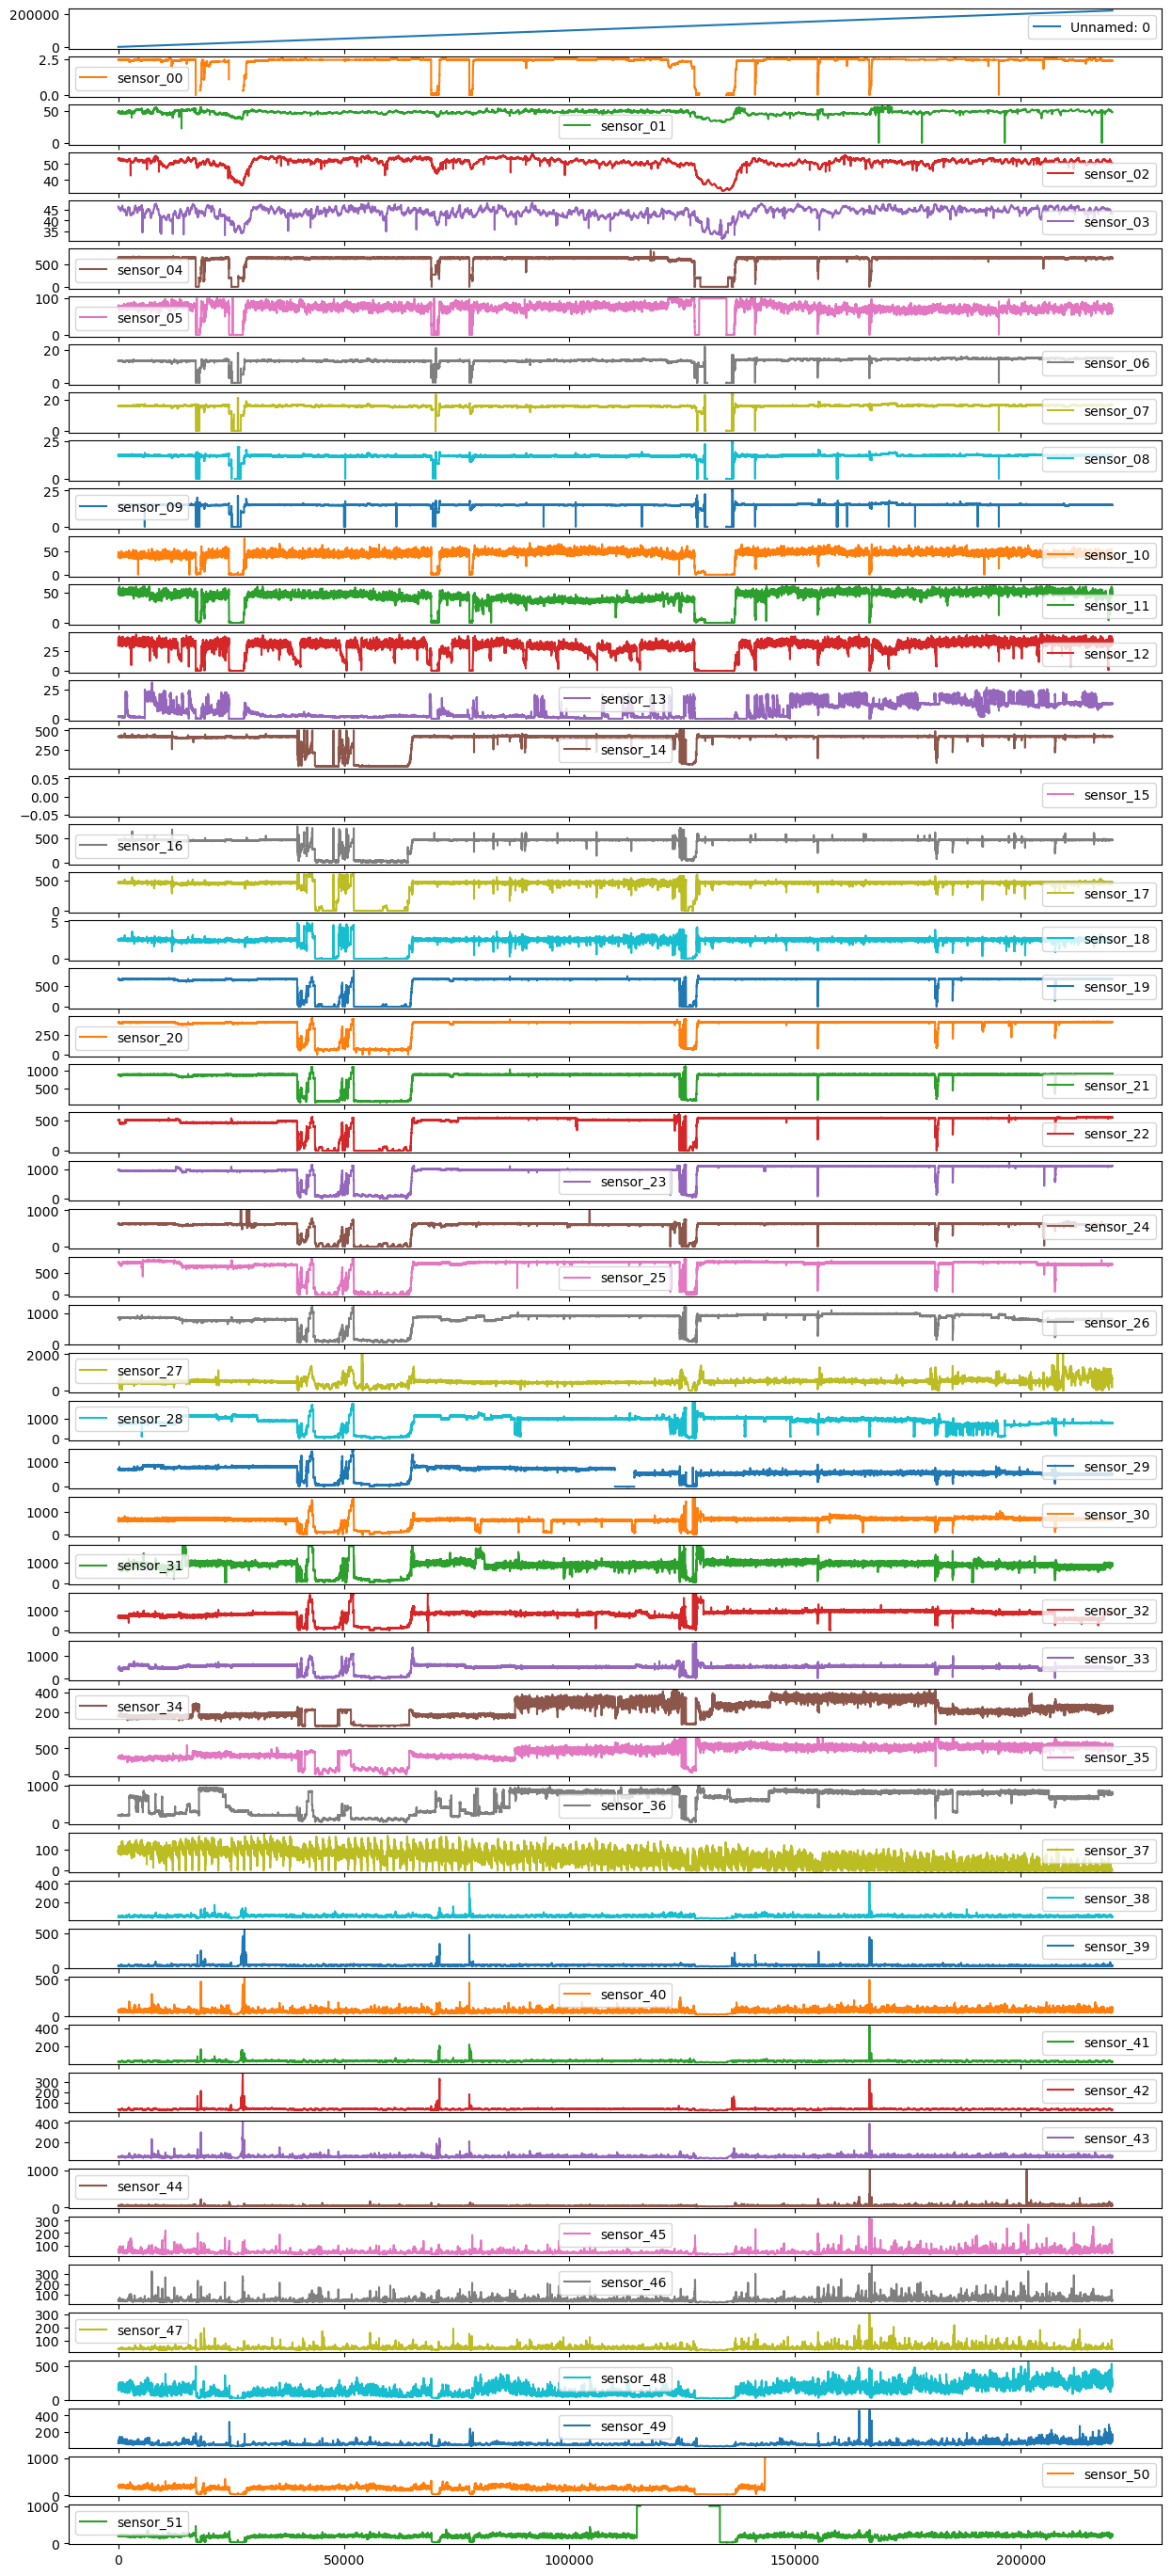

In [7]:
df.plot(subplots =True, sharex = True, figsize = (15,35))


In [8]:
(df.isnull().sum().sort_values(ascending=False)/len(df))*100

sensor_15         100.000000
sensor_50          34.956881
sensor_51           6.982117
sensor_00           4.633261
sensor_07           2.474129
sensor_08           2.317992
sensor_06           2.177741
sensor_09           2.085603
sensor_01           0.167484
sensor_30           0.118464
sensor_29           0.032680
sensor_32           0.030864
sensor_18           0.020879
sensor_17           0.020879
sensor_22           0.018609
sensor_25           0.016340
sensor_16           0.014070
sensor_40           0.012255
sensor_41           0.012255
sensor_43           0.012255
sensor_44           0.012255
sensor_39           0.012255
sensor_38           0.012255
sensor_45           0.012255
sensor_46           0.012255
sensor_47           0.012255
sensor_48           0.012255
sensor_42           0.012255
sensor_49           0.012255
sensor_14           0.009532
sensor_26           0.009078
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05     

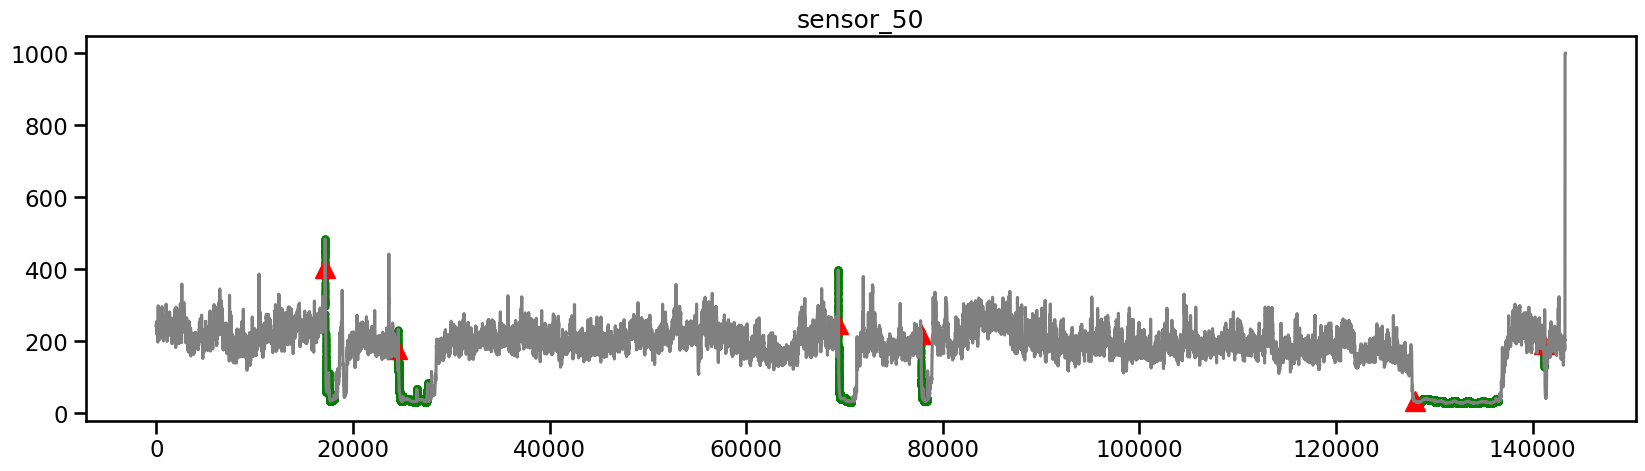

In [9]:
broken = df[df['machine_status'] == 'BROKEN']
recovery = df[df['machine_status'] == 'RECOVERING']

sns.set_context('talk')

plt.figure(figsize=(20, 5))

plt.plot(recovery['sensor_50'], linestyle='none', marker='o', color='green', markersize=5)

plt.plot(broken['sensor_50'], linestyle='none', marker='^', color='red', markersize=14)

plt.plot(df['sensor_50'], color='grey')

plt.title('sensor_50')

plt.show()

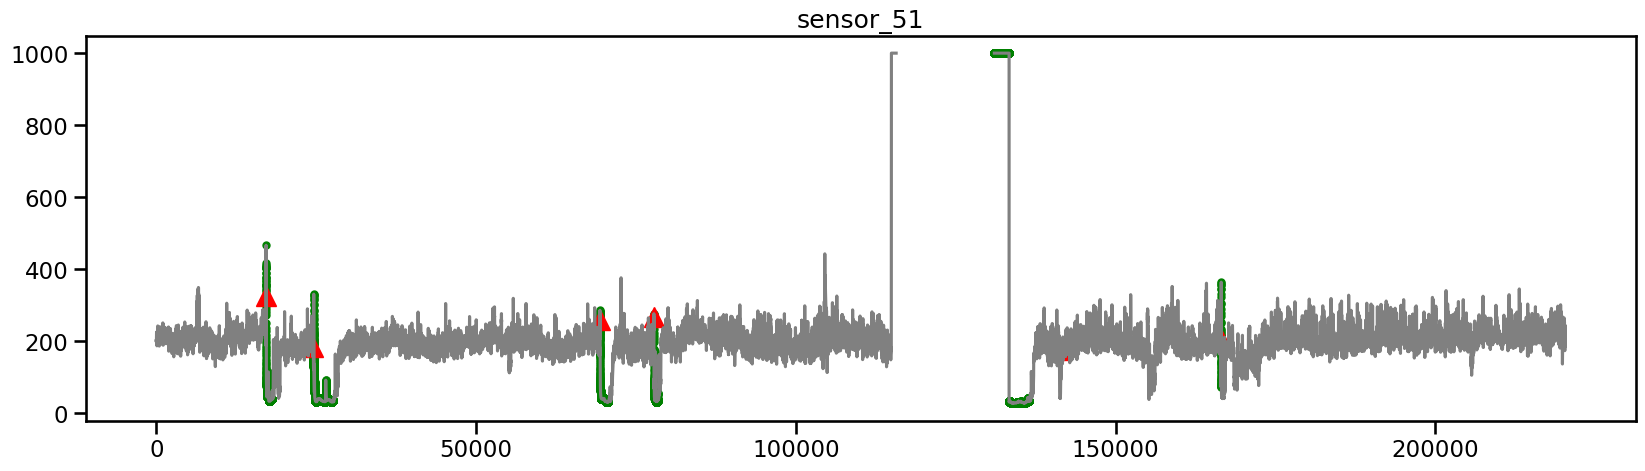

In [10]:
sns.set_context('talk')

plt.figure(figsize=(20, 5))

plt.plot(recovery['sensor_51'], linestyle='none', marker='o', color='green', markersize=5)

plt.plot(broken['sensor_51'], linestyle='none', marker='^', color='red', markersize=14)

plt.plot(df['sensor_51'], color='grey')

plt.title('sensor_51')

plt.show()


In [11]:
data = df.drop(['sensor_15', 'sensor_50', 'sensor_51', 'Unnamed: 0'], axis=1)

data.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_41  sensor_42  \
0   76.45975   13.41146   16.13136   15.56713  ...   30.98958  31.770832   
1   76.45975   13.41146   16.13136   15.56713  ...   30.98958  31.770832   
2   73.54598   13.32465   16.03733   15.61777  ...   30.46875  31.770830   
3   76.98898   13.31742   16.24711   15.69734  ...   30.46875  31.510420   
4   76.58897   13.35359   16.21094   15.69734  ...   30.98958  31.510420   

   sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2   41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3   40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4   41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   

   sensor_49  machine_status  
0   67.70834          NORMAL  
1   67.70834          NORMAL  
2   67.12963          NORMAL  
3   66.84028          NORMAL  
4   66.55093          NORMAL  

[5 rows x 51 columns]

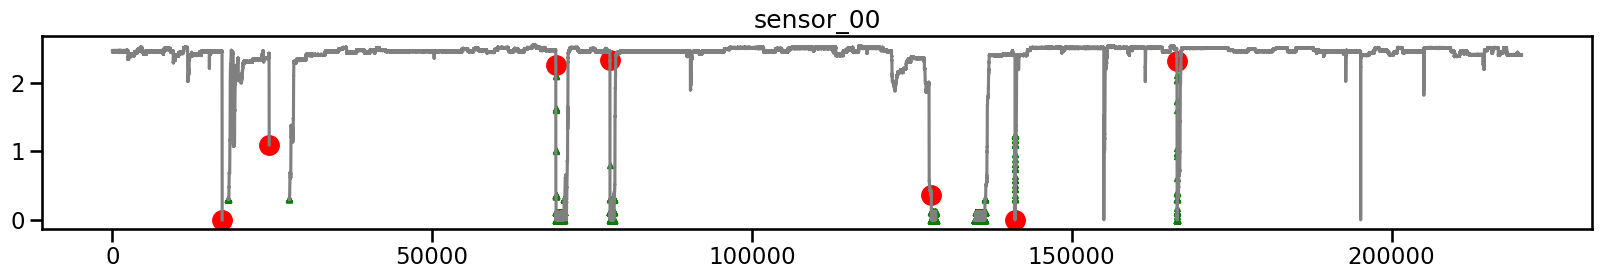

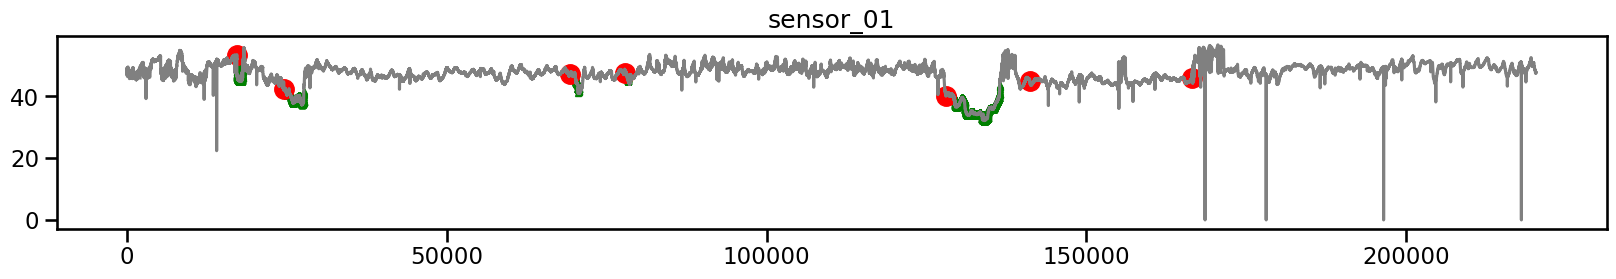

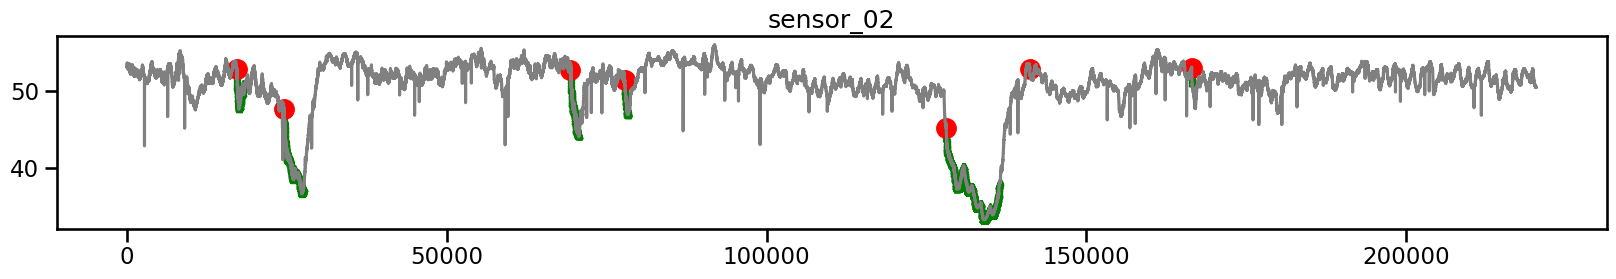

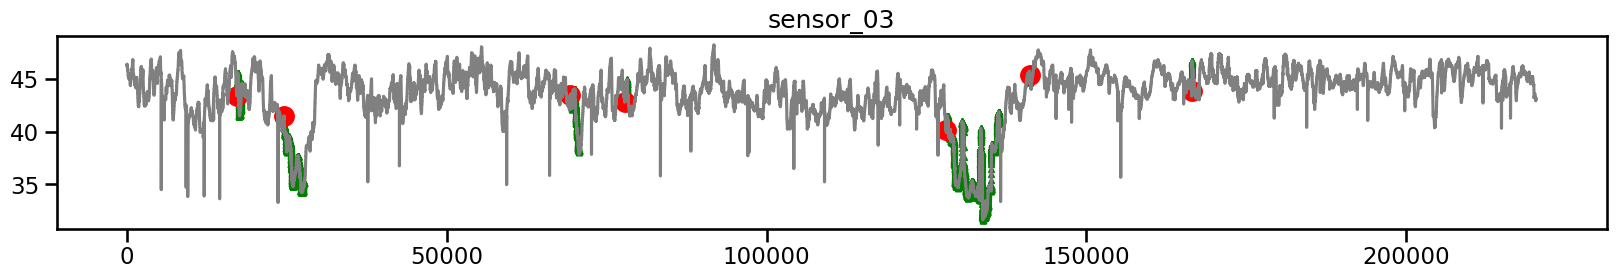

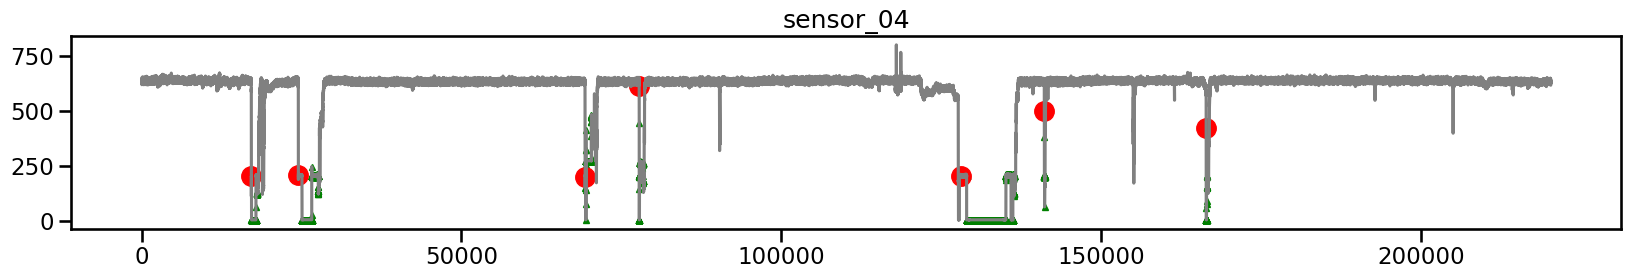

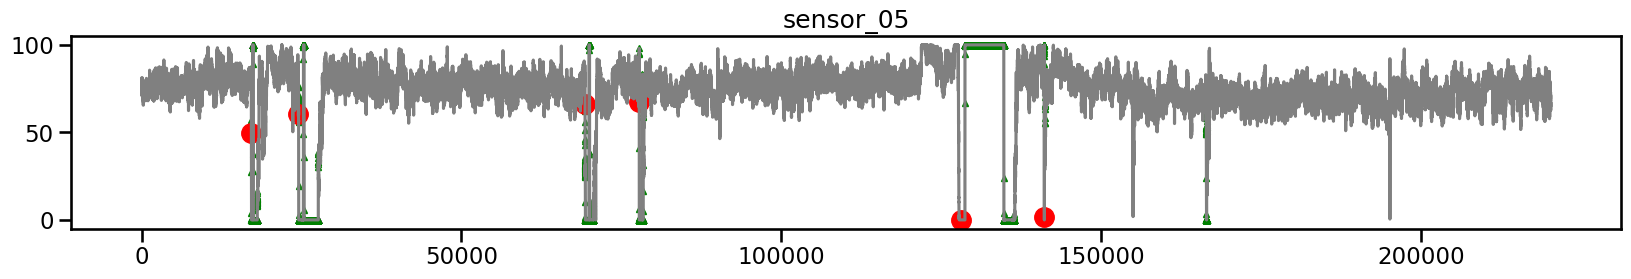

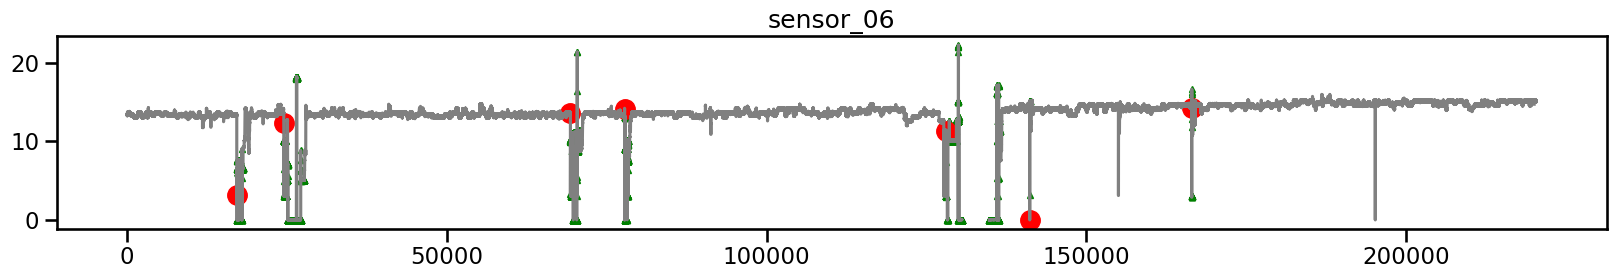

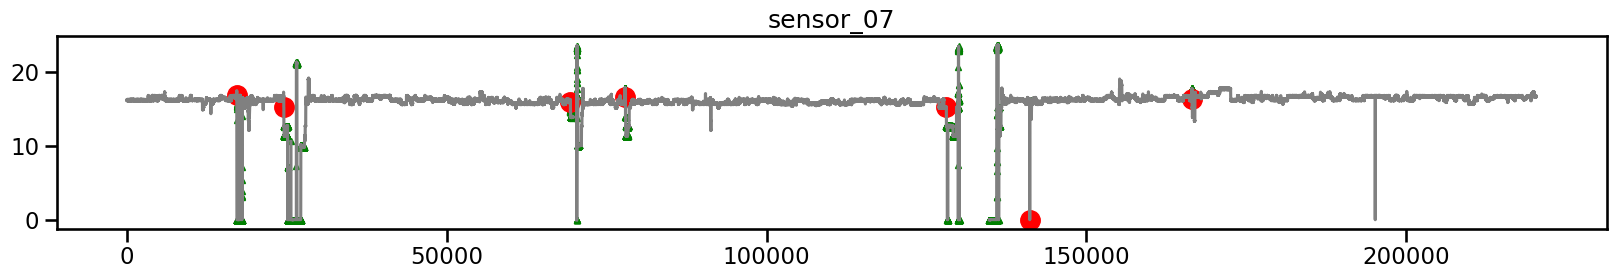

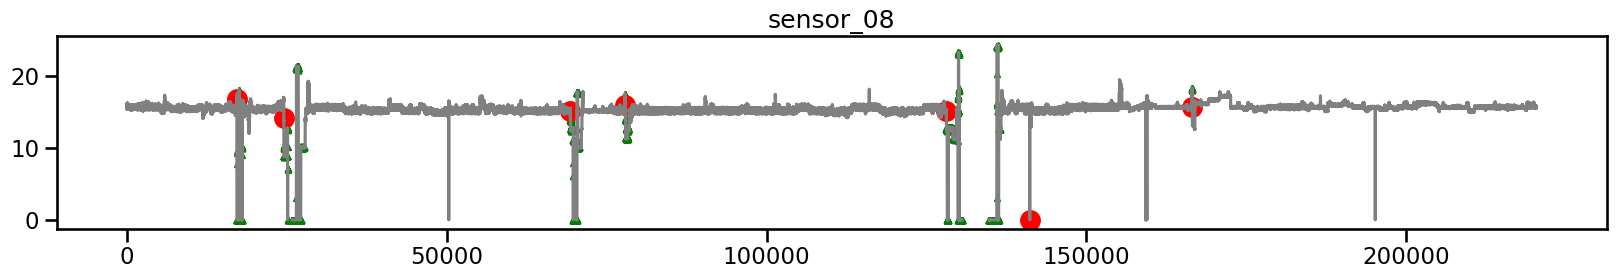

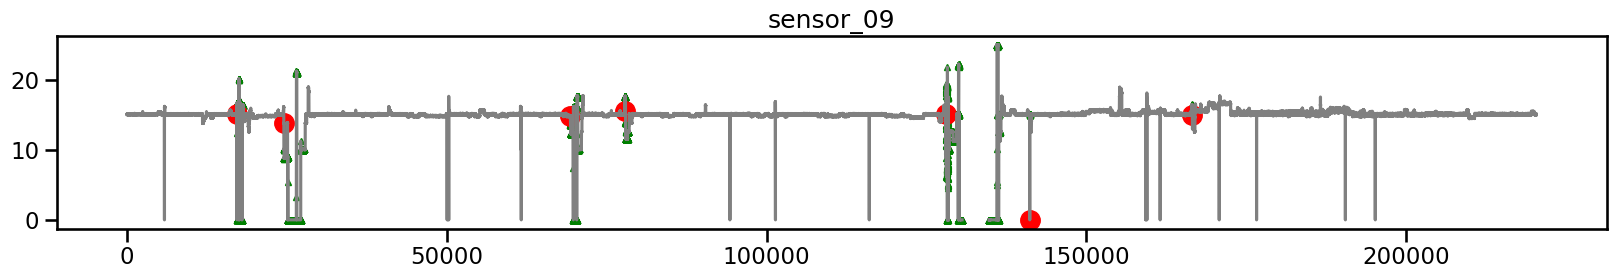

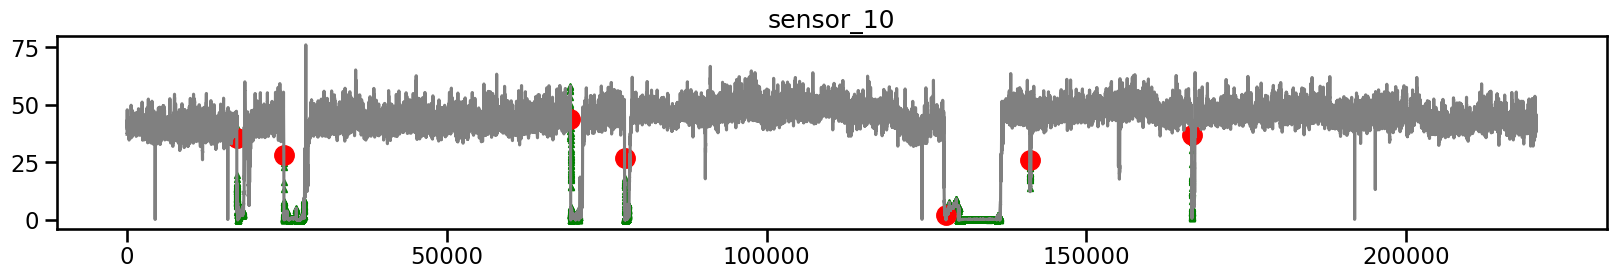

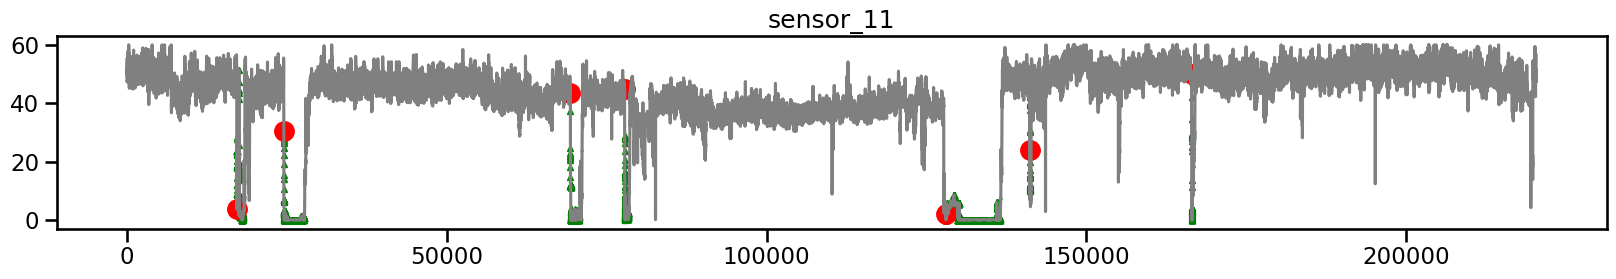

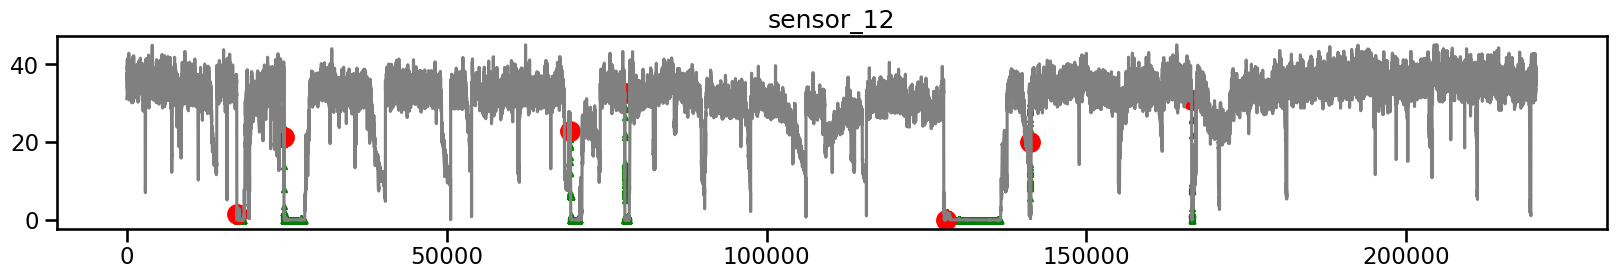

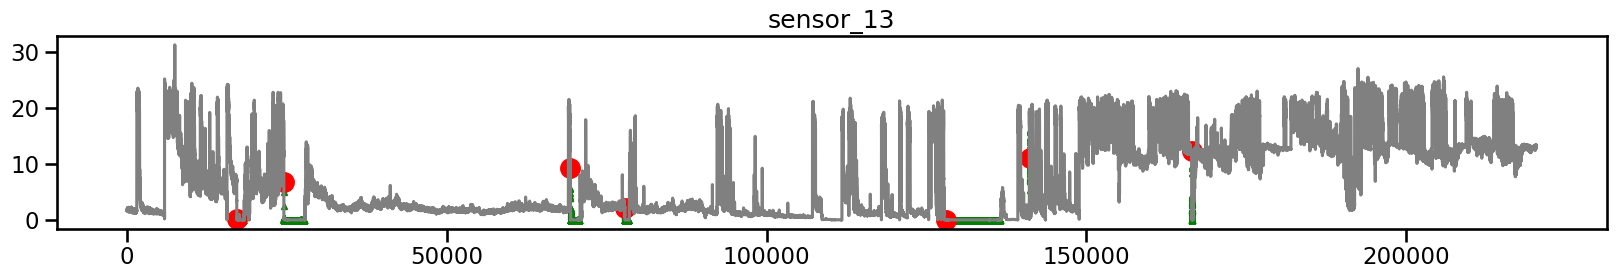

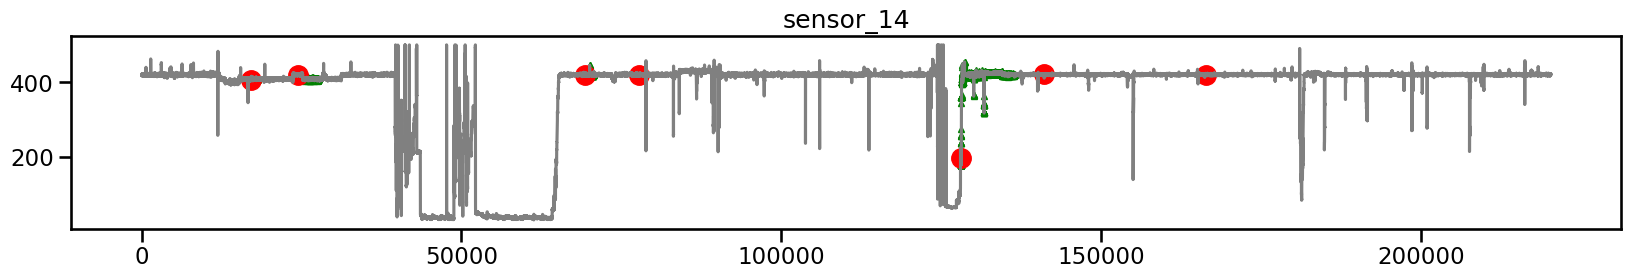

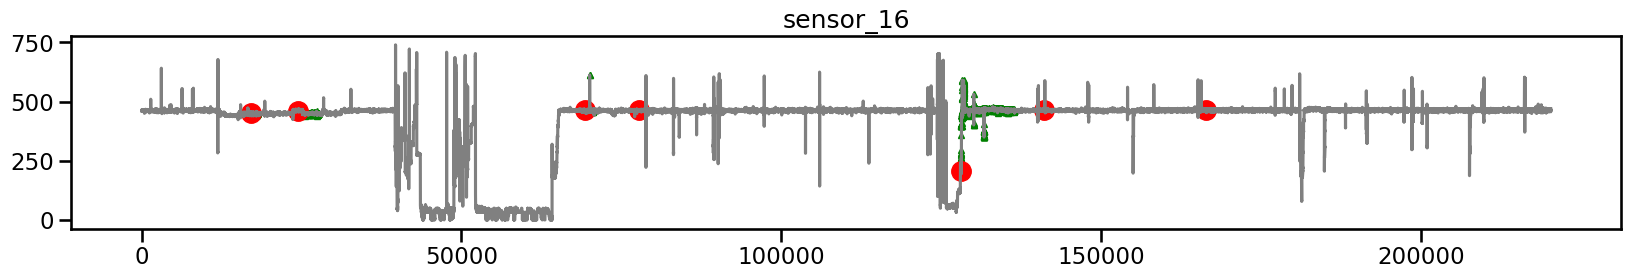

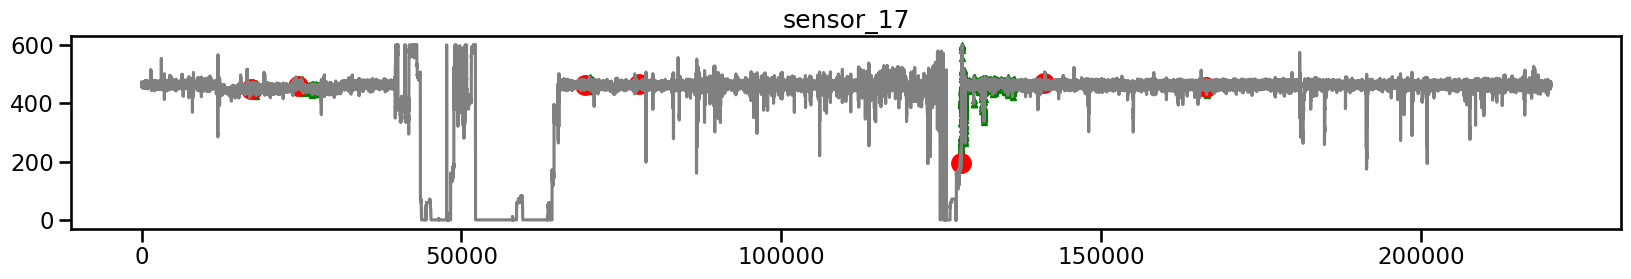

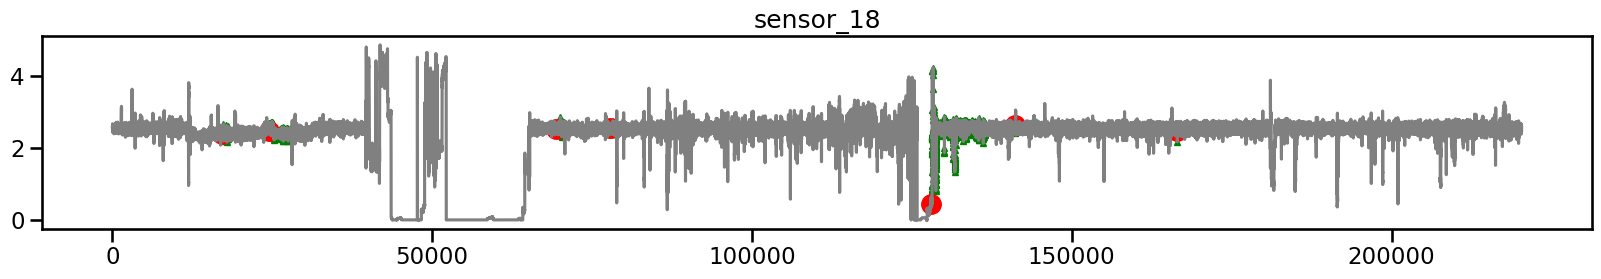

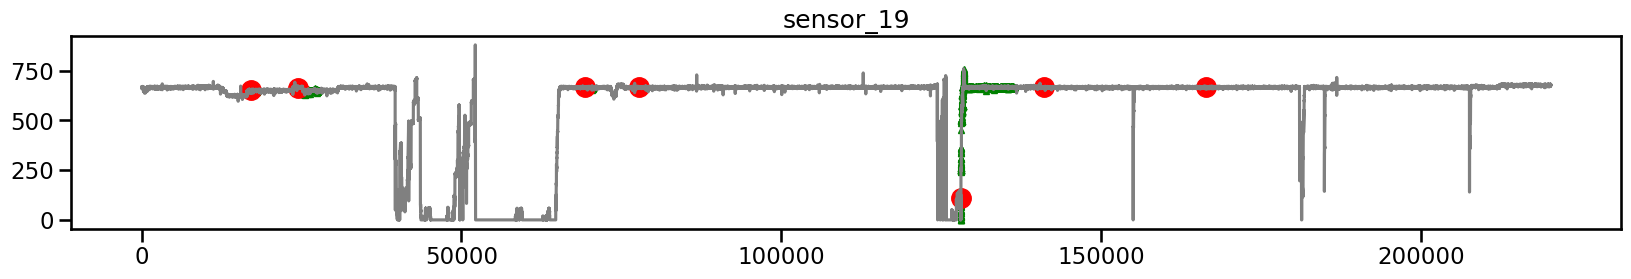

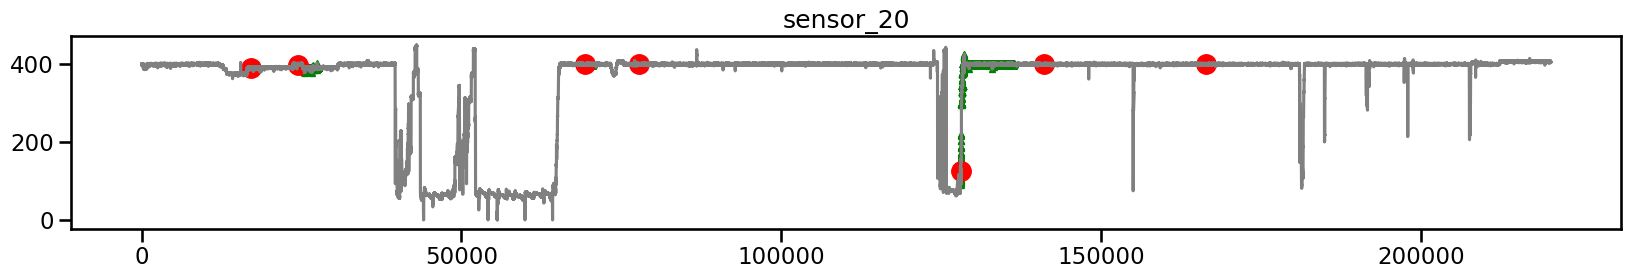

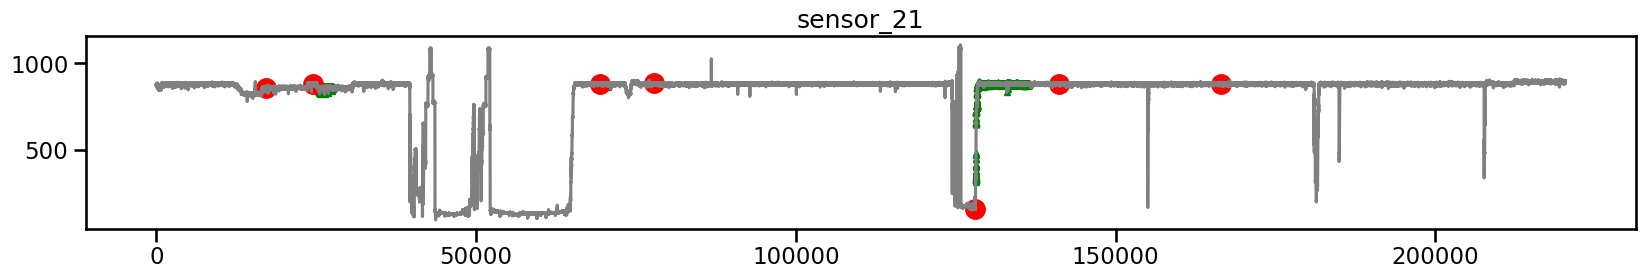

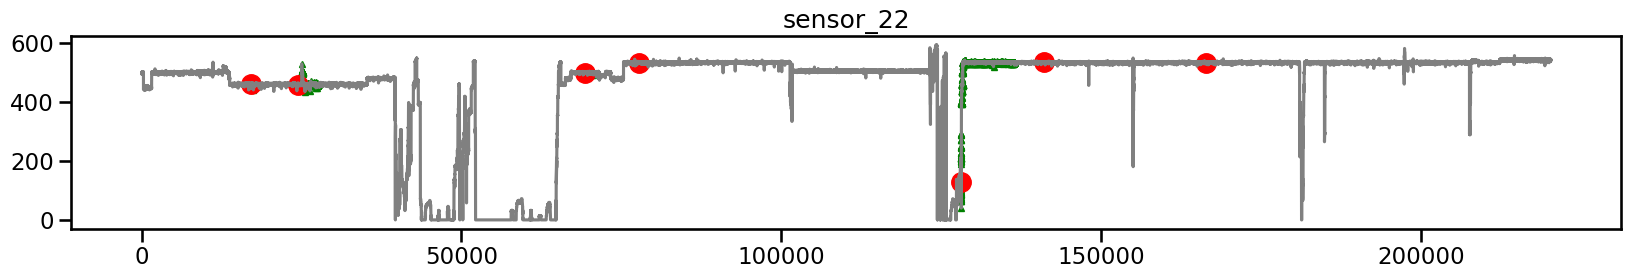

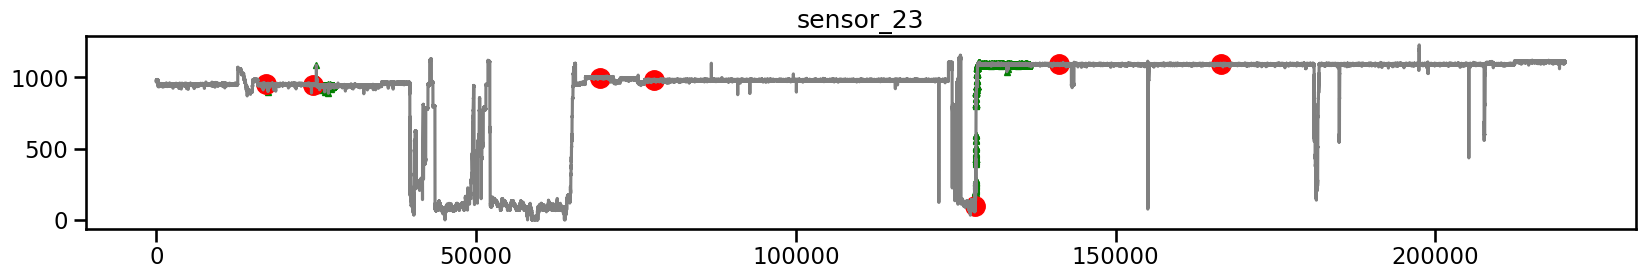

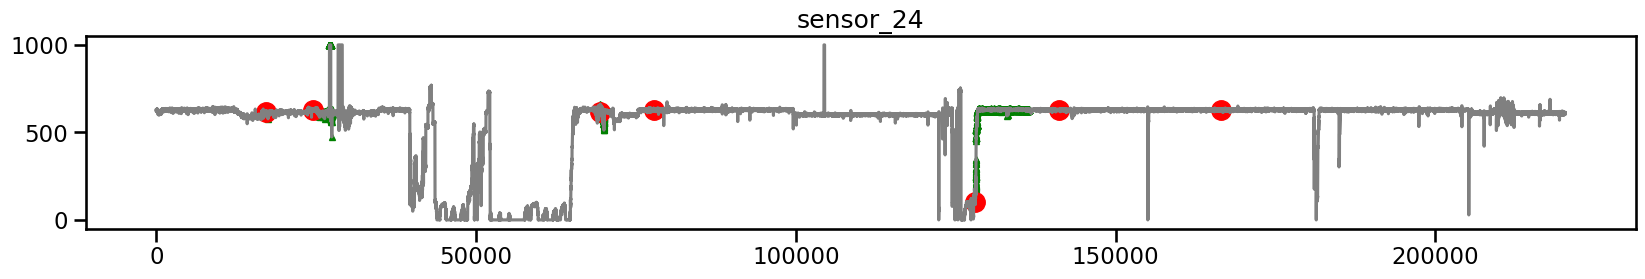

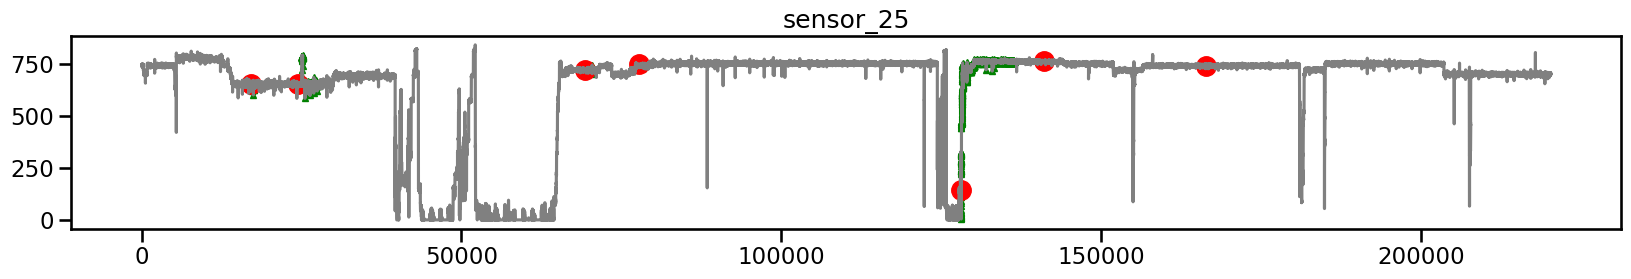

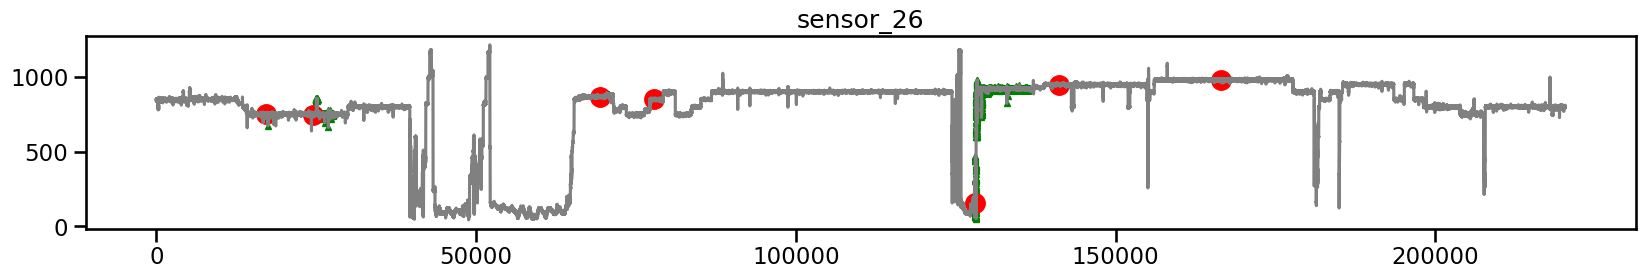

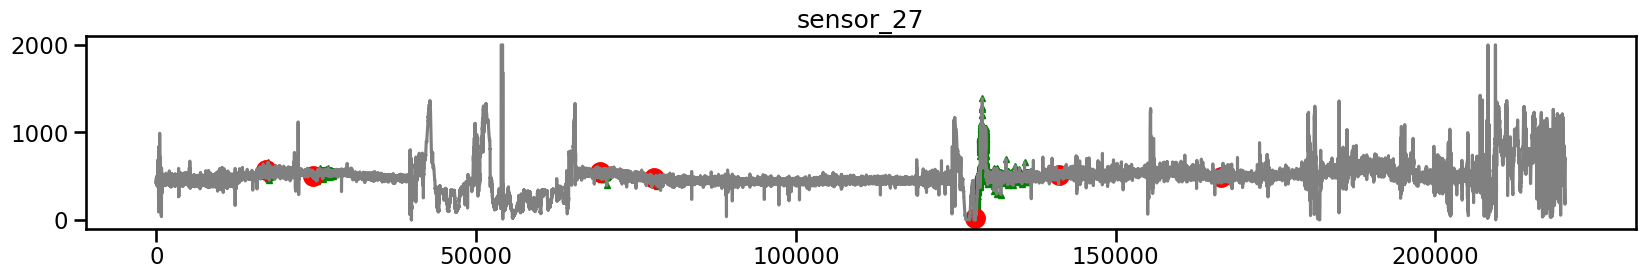

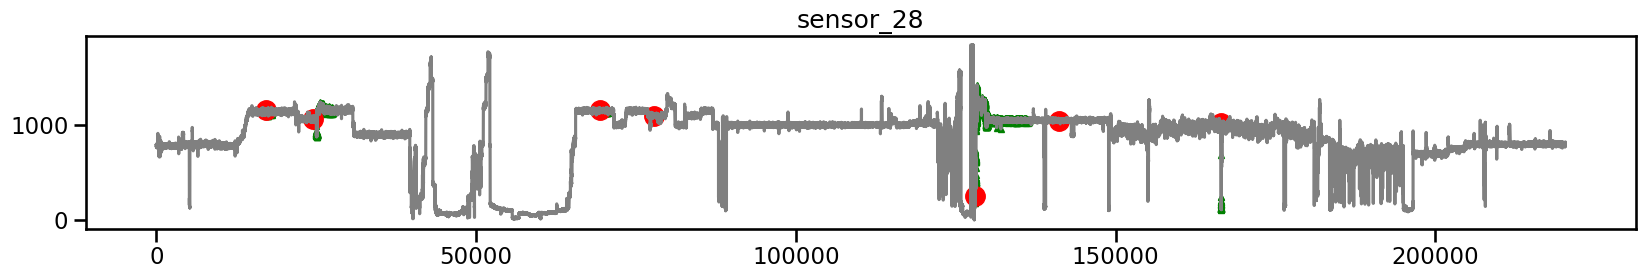

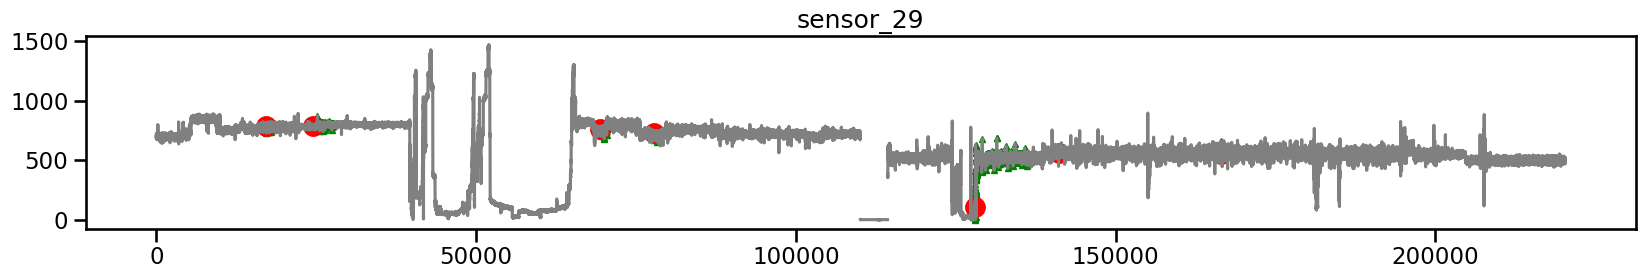

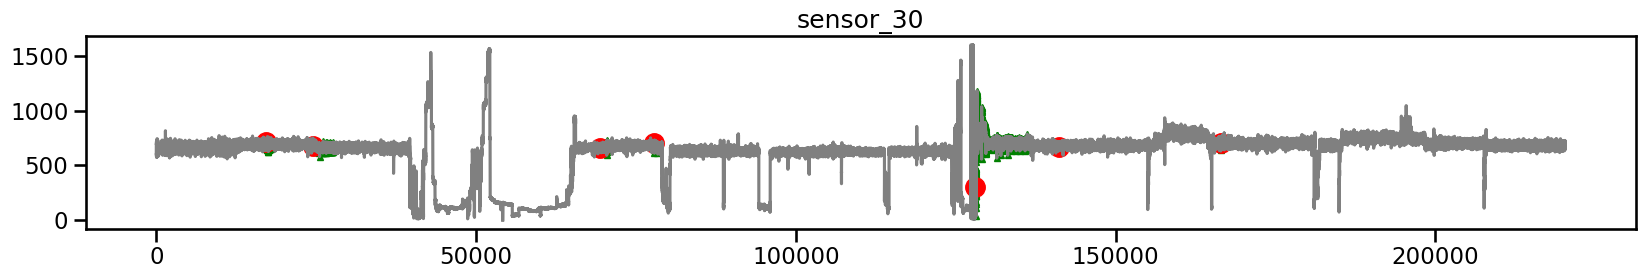

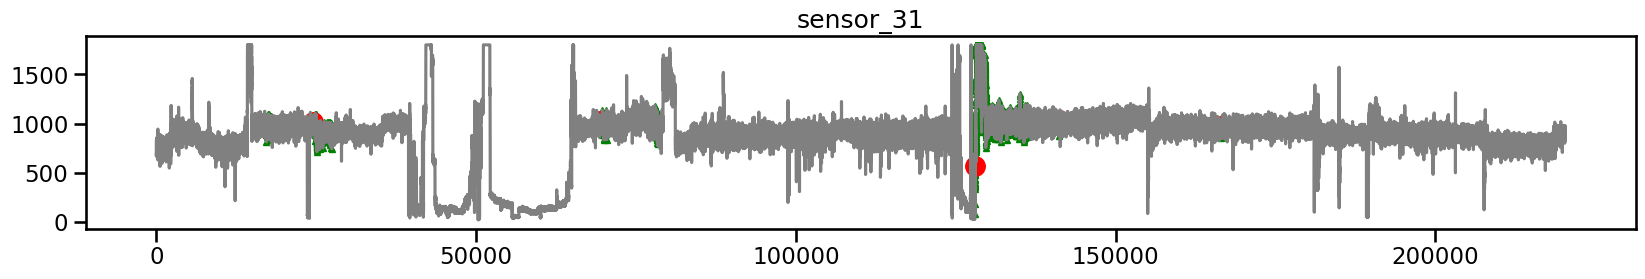

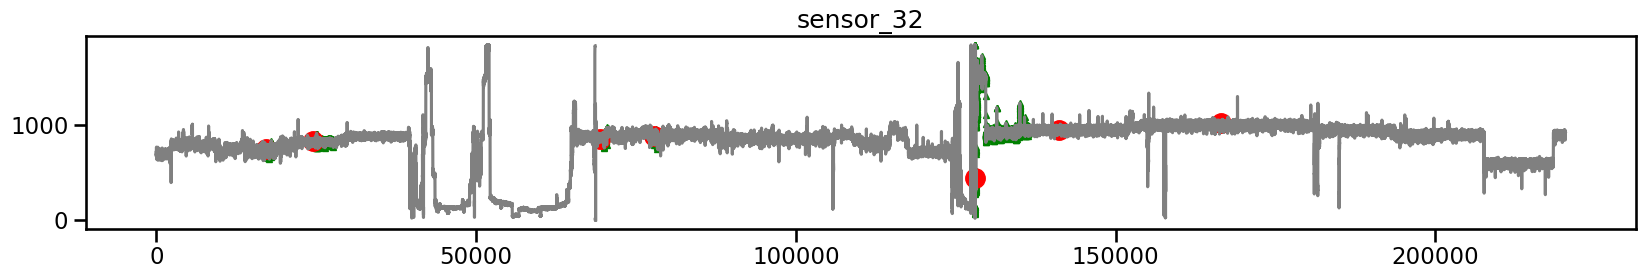

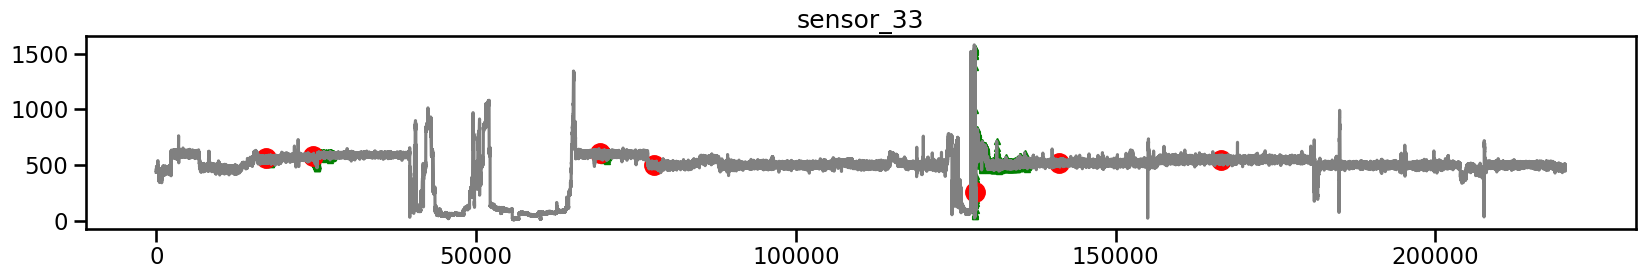

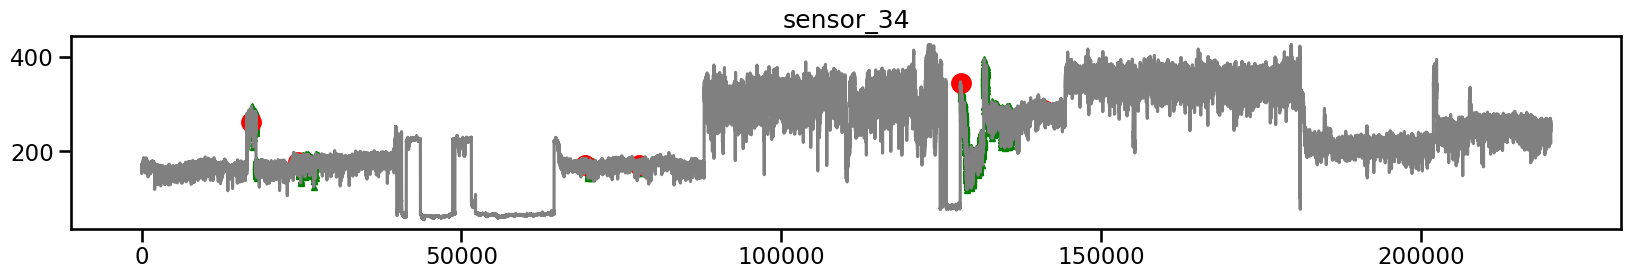

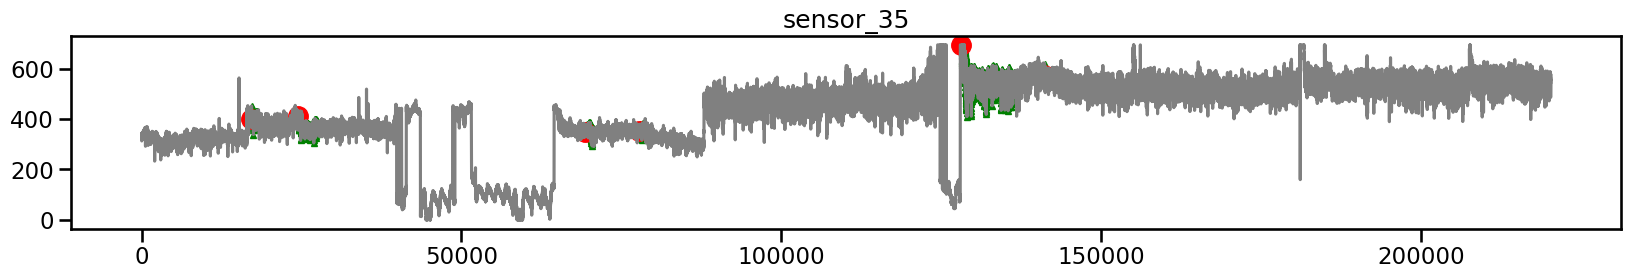

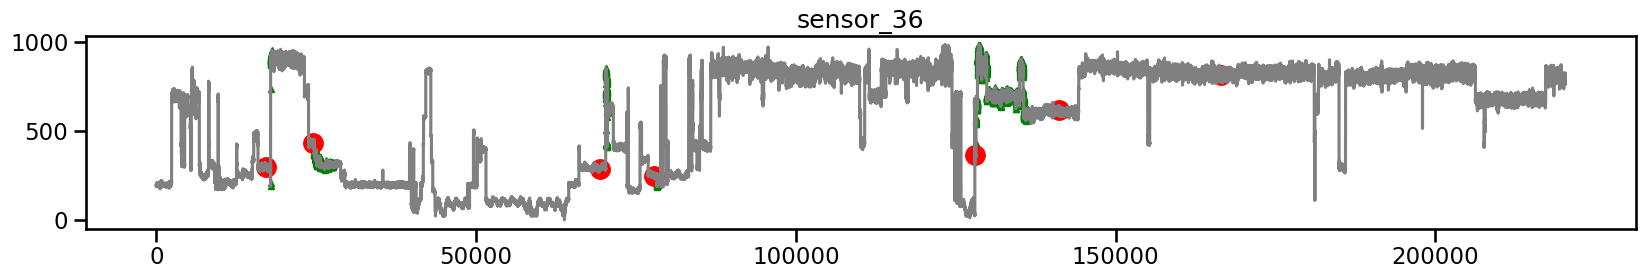

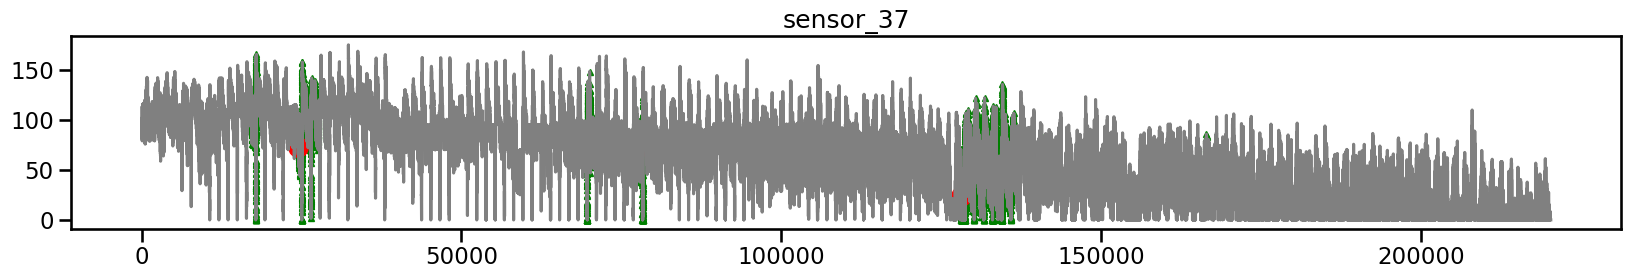

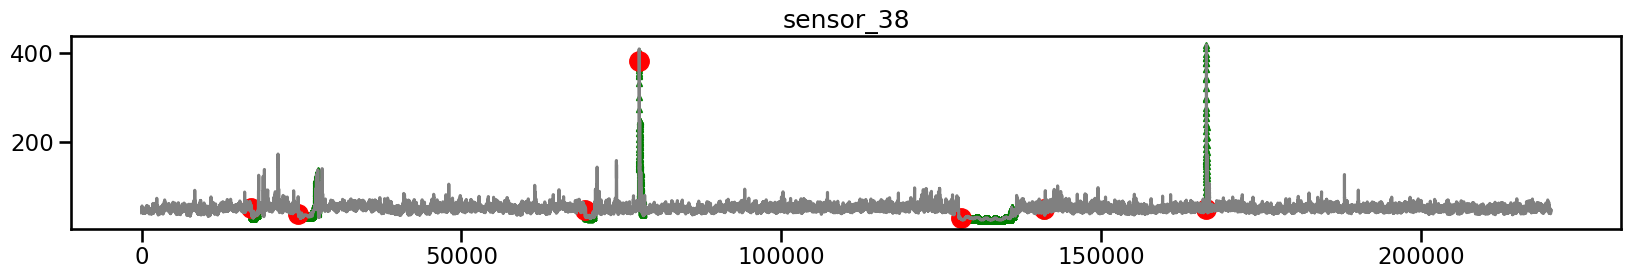

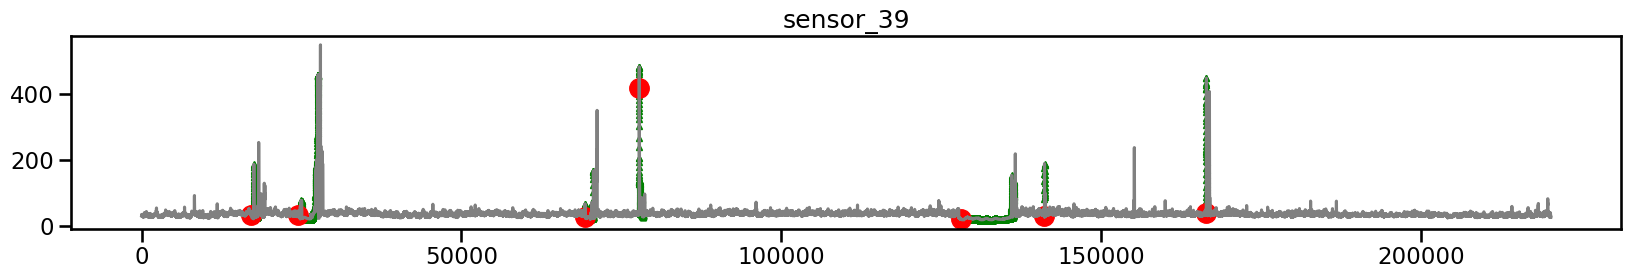

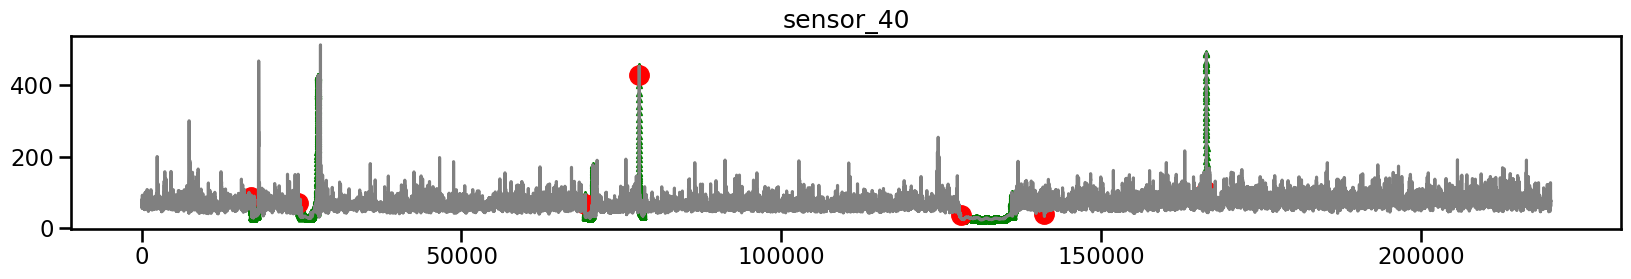

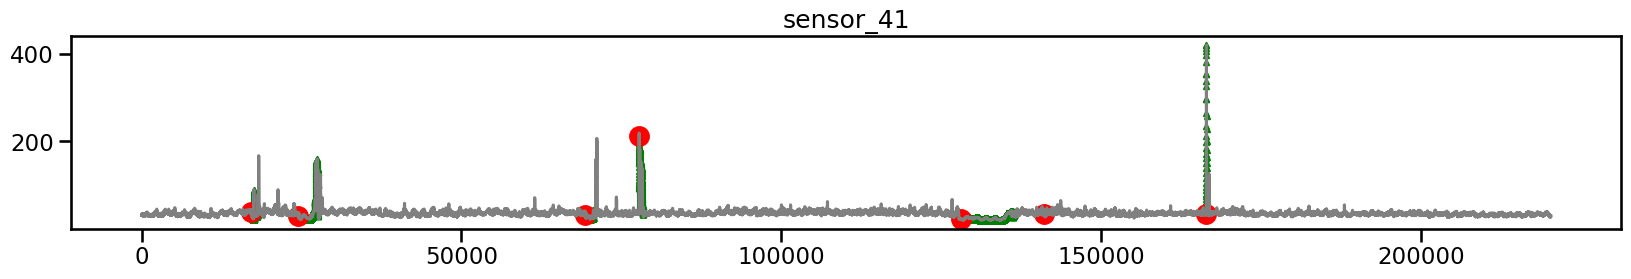

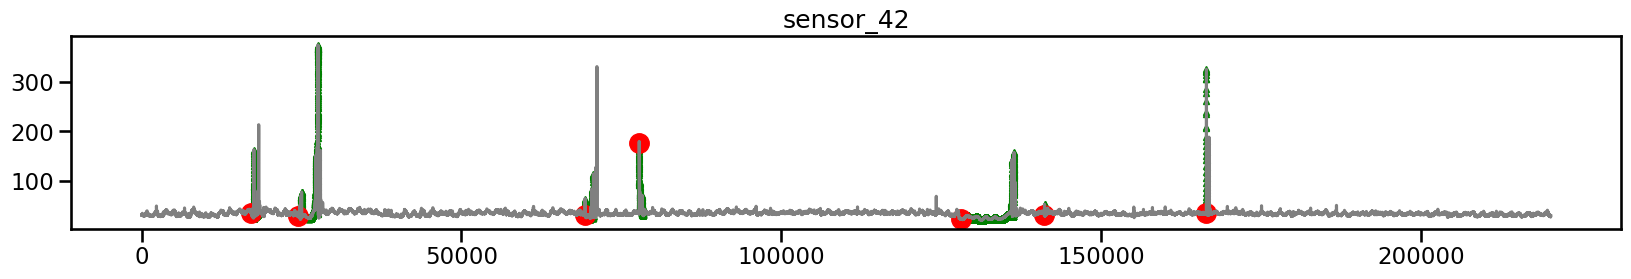

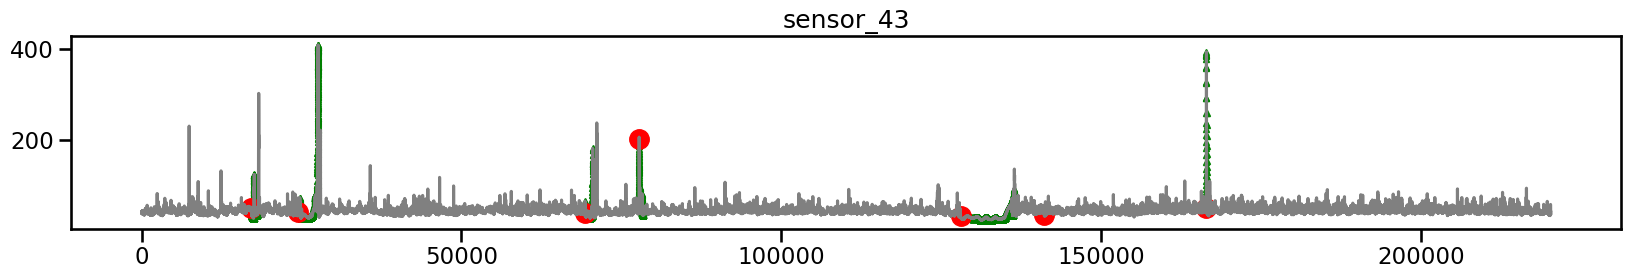

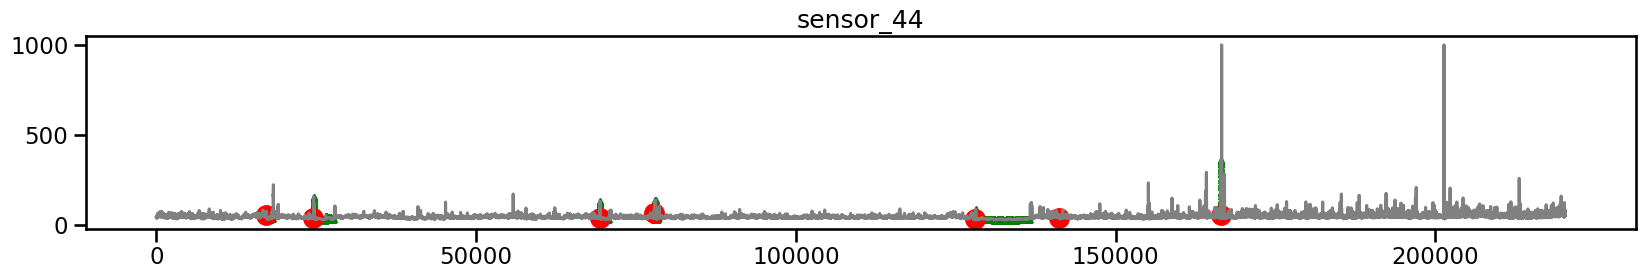

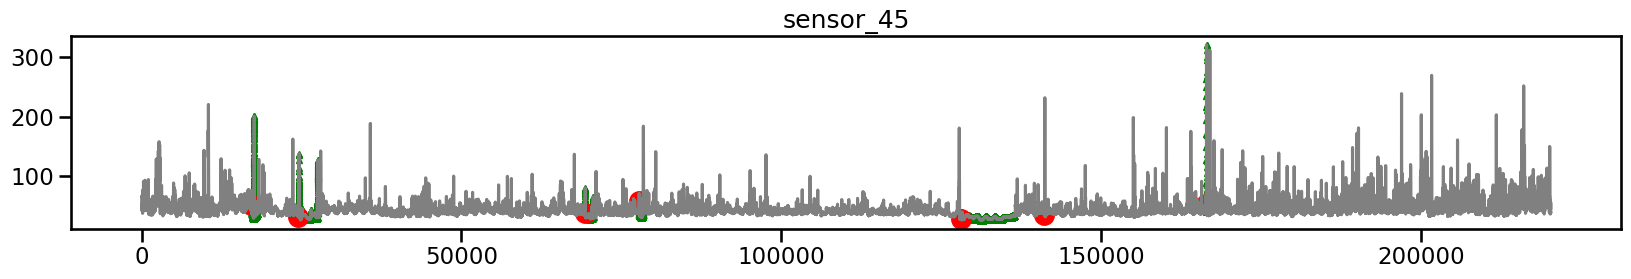

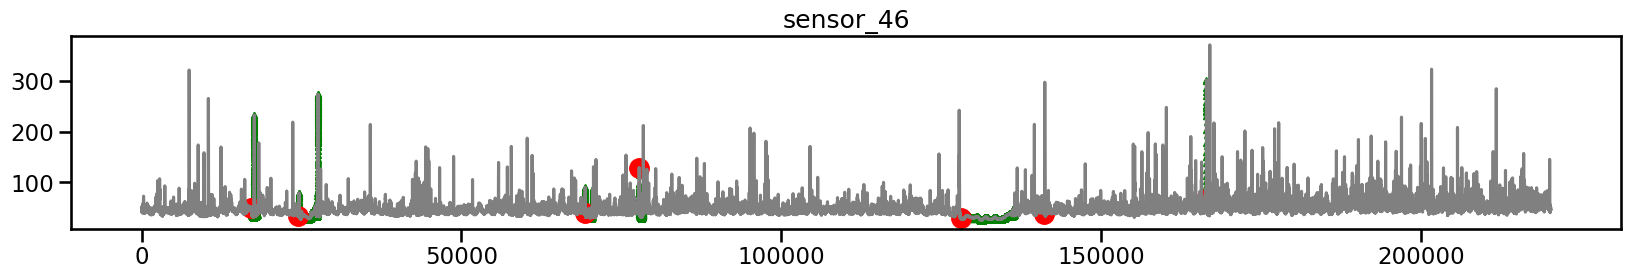

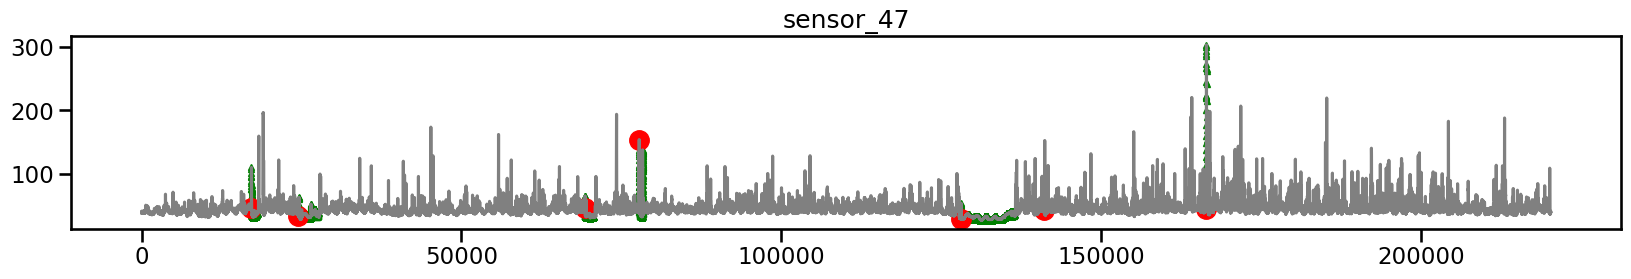

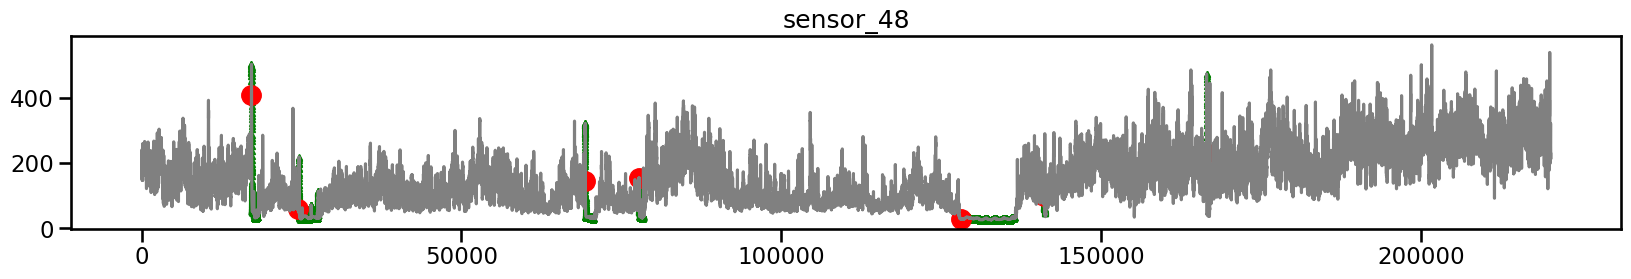

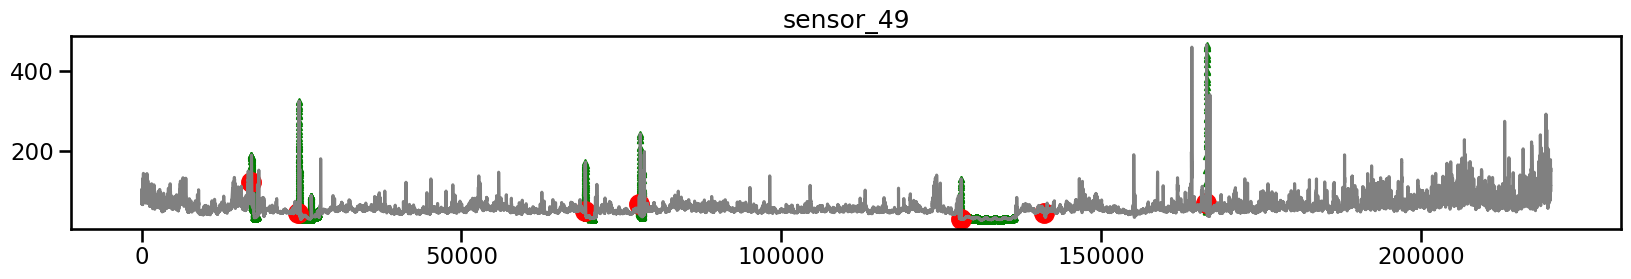

In [12]:
sensors_data = data.iloc[:, 1:50]  
sensor_names = sensors_data.columns  

for sensor in sensor_names:
    sns.set_context('talk')    
    plt.figure(figsize=(20, 2.5))
    
    plt.plot(recovery[sensor], linestyle='none', marker='^', color='green', markersize=5)
    
    plt.plot(broken[sensor], linestyle='none', marker='o', color='red', markersize=14)
    
    plt.plot(df[sensor], color='grey')
    
    plt.title(sensor)
    plt.show()

In [13]:
def calc_percent_NAs(sensors_data):
    nans = pd.DataFrame(sensors_data.isnull().sum().sort_values(ascending=False)/len(sensors_data), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

calc_percent_NAs(sensors_data).head(10)

percent
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327
sensor_32  0.000309
sensor_17  0.000209

In [14]:
names = data.iloc[:, 1:50].columns

x = data.iloc[:, 1:50].fillna(method='ffill')
scaler = preprocessing.Normalizer(norm='max')
x = scaler.fit_transform(x.transpose())
x = pd.DataFrame(x.transpose())
x.columns = sensor_names

y = data['machine_status']

x.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0   0.967194   0.830145   0.949651   0.960396   0.792969   0.764598   
1   0.967194   0.830145   0.949651   0.960396   0.792969   0.764598   
2   0.959089   0.834736   0.949651   0.962196   0.798611   0.735461   
3   0.965264   0.830145   0.948877   0.962196   0.785156   0.769891   
4   0.959475   0.830910   0.949651   0.962196   0.795573   0.765891   

   sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_40  sensor_41  \
0   0.602731   0.683630   0.639334   0.602141  ...   0.137633   0.073730   
1   0.602731   0.683630   0.639334   0.602141  ...   0.137633   0.073730   
2   0.598829   0.679645   0.641414   0.600405  ...   0.135602   0.072491   
3   0.598505   0.688535   0.644682   0.603299  ...   0.140681   0.072491   
4   0.600130   0.687002   0.644682   0.603299  ...   0.149822   0.073730   

   sensor_42  sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  \
0   0.084899   0.102613   0.039641   0.205059   0.137500   0.125834   
1   0.084899   0.102613   0.039641   0.205059   0.137500   0.125834   
2   0.084899   0.101976   0.039352   0.204155   0.138281   0.125834   
3   0.084203   0.100064   0.039062   0.202349   0.138281   0.125834   
4   0.084203   0.101338   0.038773   0.203252   0.139844   0.127741   

   sensor_48  sensor_49  
0   0.281298   0.145794  
1   0.281298   0.145794  
2   0.277692   0.144548  
3   0.277692   0.143925  
4   0.281814   0.143302  

[5 rows x 49 columns]

In [15]:
calc_percent_NAs(data).head(10)


percent
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327
sensor_32  0.000309
sensor_18  0.000209

In [16]:
y.unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [17]:
encoded_y = pd.get_dummies(y)
encoded_y.head()

BROKEN  NORMAL  RECOVERING
0       0       1           0
1       0       1           0
2       0       1           0
3       0       1           0
4       0       1           0

In [18]:
calc_percent_NAs(df).head(10)


percent
sensor_15  1.000000
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185

In [19]:
data = data.dropna()


In [20]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [21]:
data = data.set_index('timestamp')


In [22]:
data.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_41  sensor_42  sensor_43  sensor_44  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   30.98958  31.770832   41.92708  39.641200   
2018-04-01 00:01:00  ...   30.98958  31.770832   41.92708  39.641200   
2018-04-01 00:02:00  ...   30.46875  31.770830   41.66666  39.351852   
2018-04-01 00:03:00  ...   30.46875  31.510420   40.88541  39.062500   
2018-04-01 00:04:00  ...   30.98958  31.510420   41.40625  38.773150   

                     sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
timestamp                                                                    
2018-04-01 00:00:00   65.68287   50.92593  38.194440   157.9861   67.70834   
2018-04-01 00:01:00   65.68287   50.92593  38.194440   157.9861   67.70834   
2018-04-01 00:02:00   65.39352   51.21528  38.194443   155.9606   67.12963   
2018-04-01 00:03:00   64.81481   51.21528  38.194440   155.9606   66.84028   
2018-04-01 00:04:00   65.10416   51.79398  38.773150   158.2755   66.55093   

                     machine_status  
timestamp                            
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 50 columns]

In [23]:
data['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

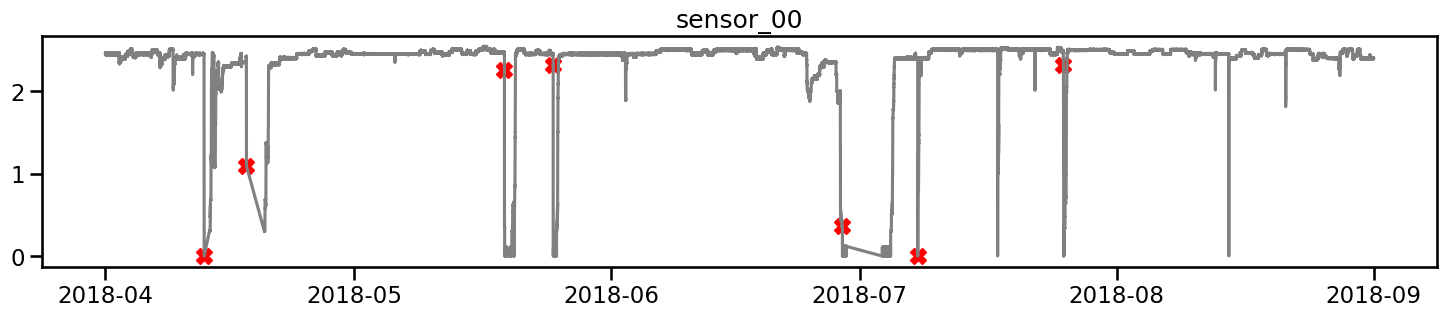

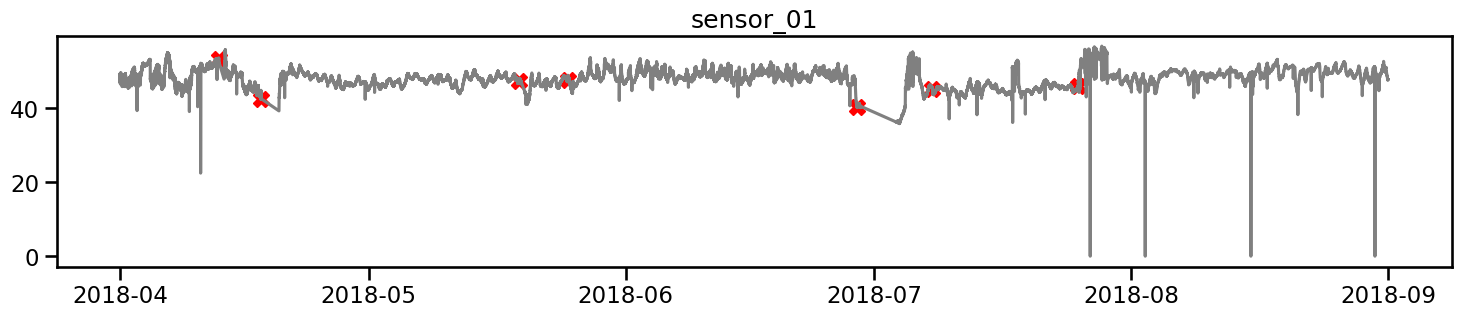

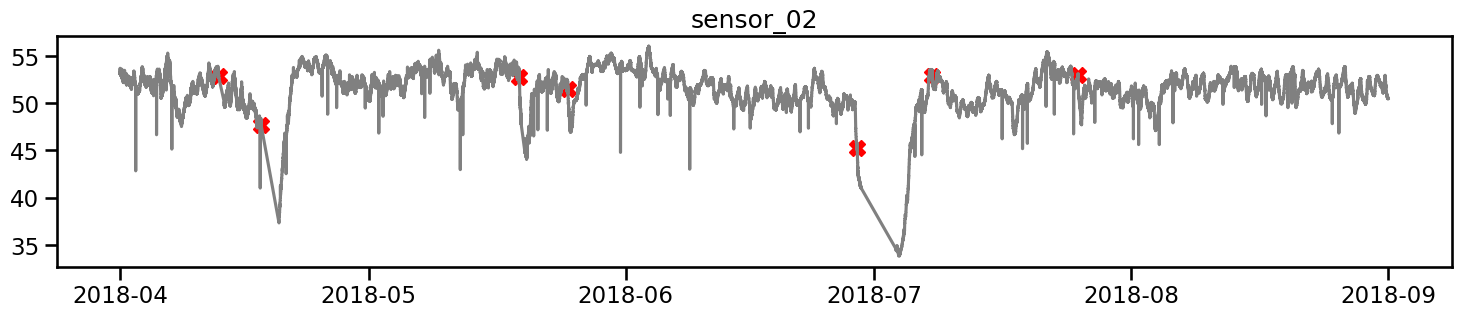

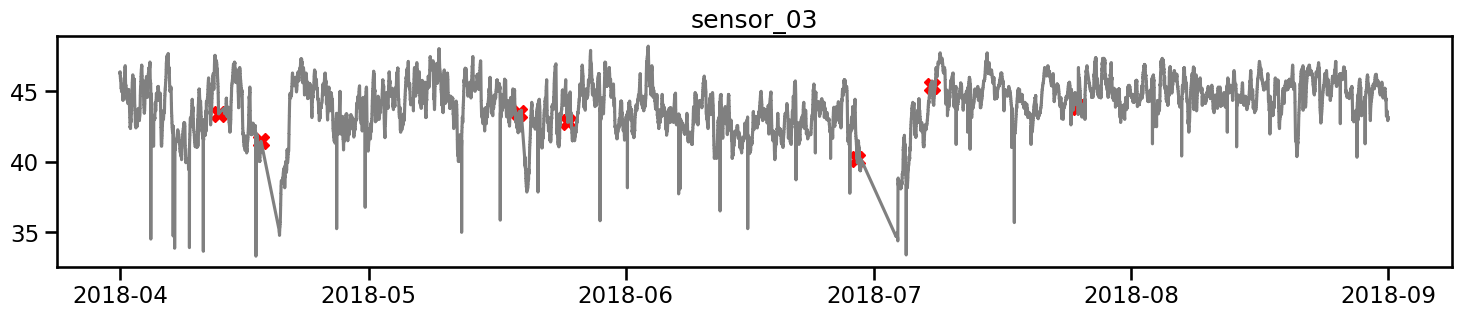

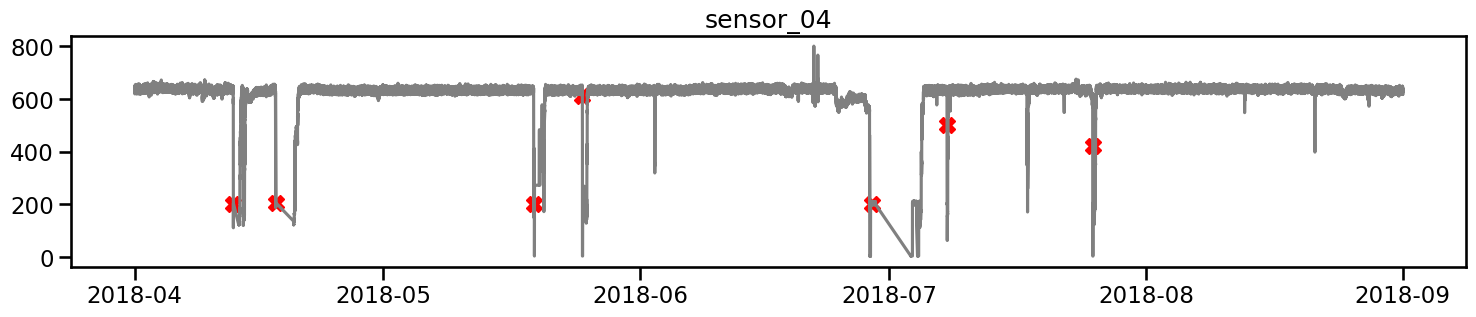

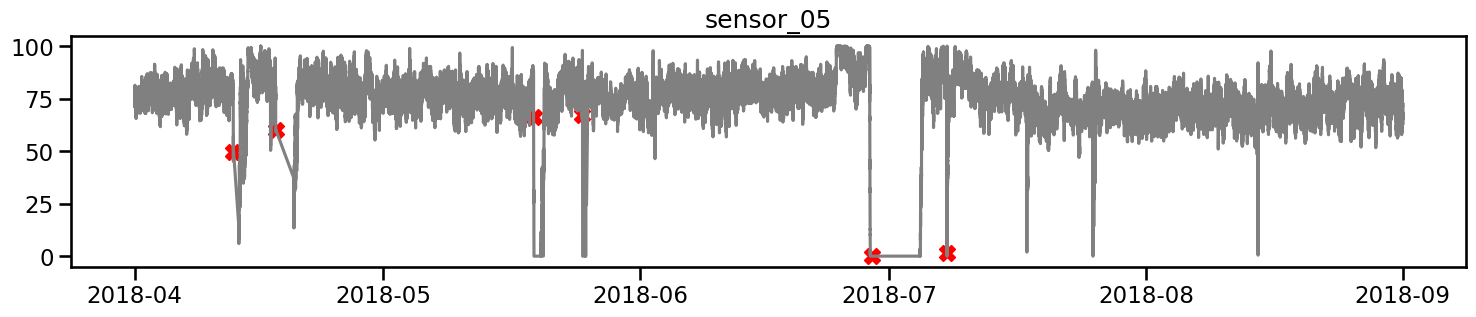

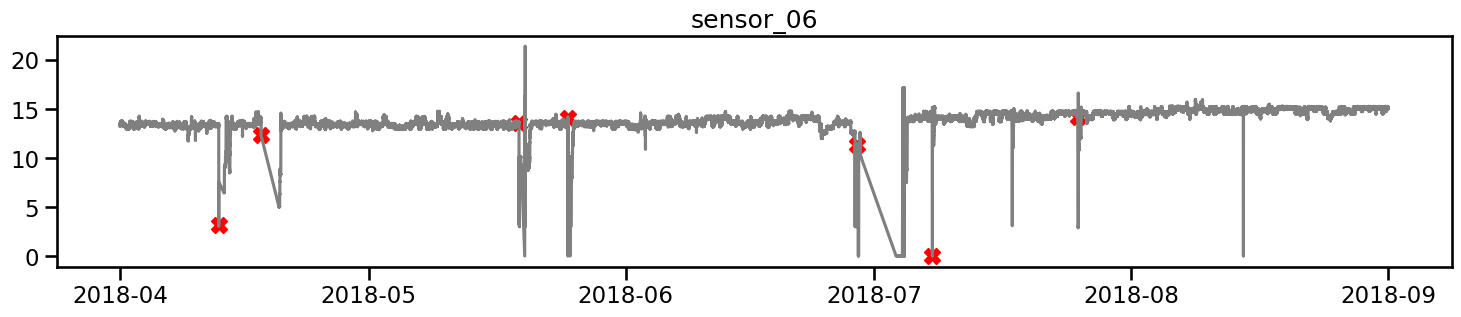

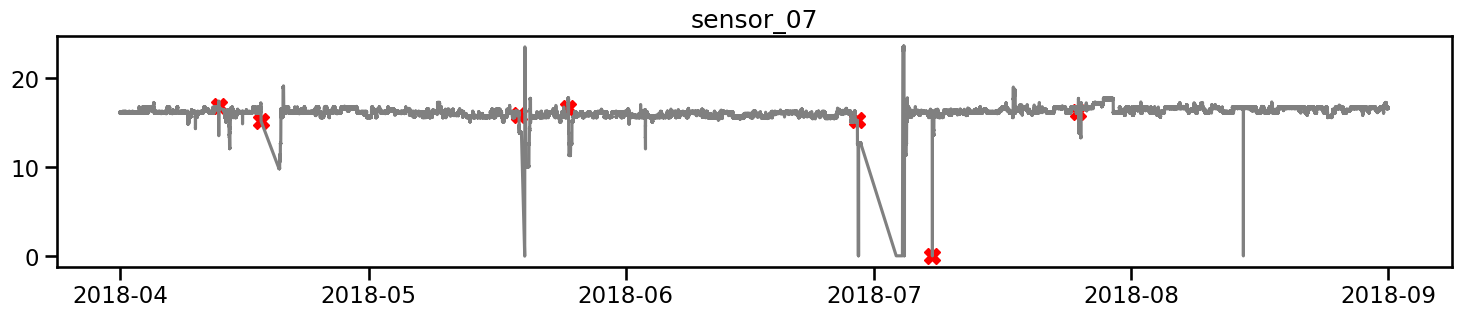

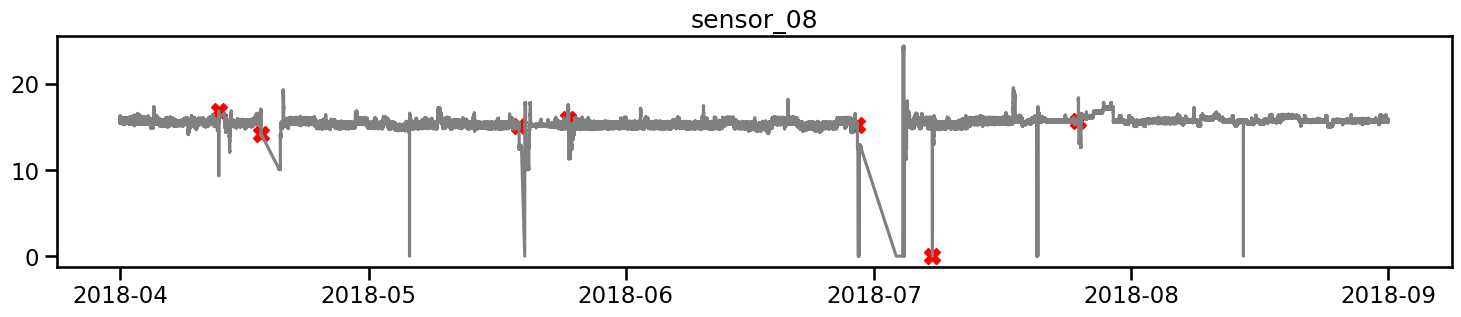

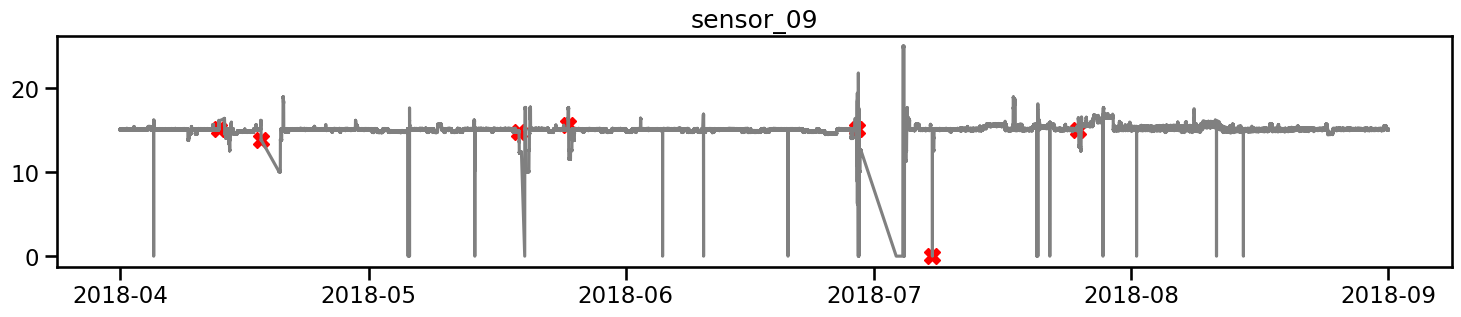

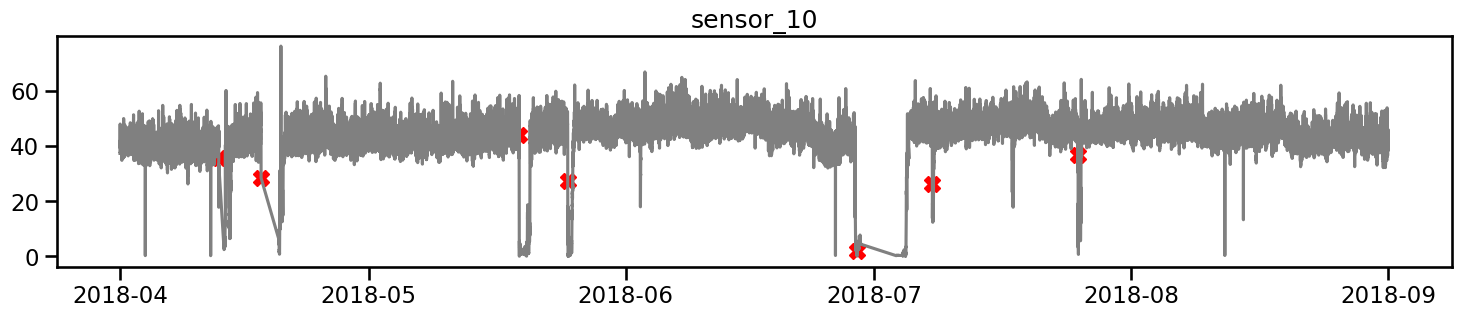

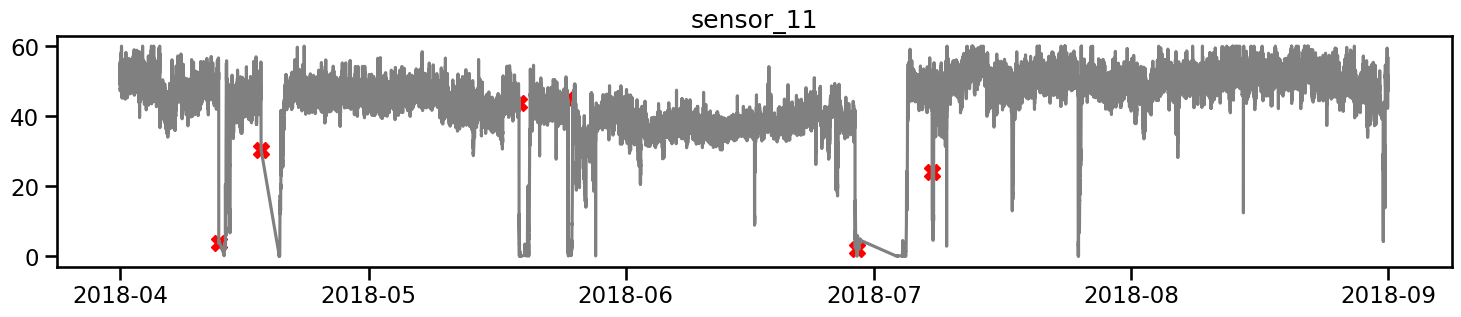

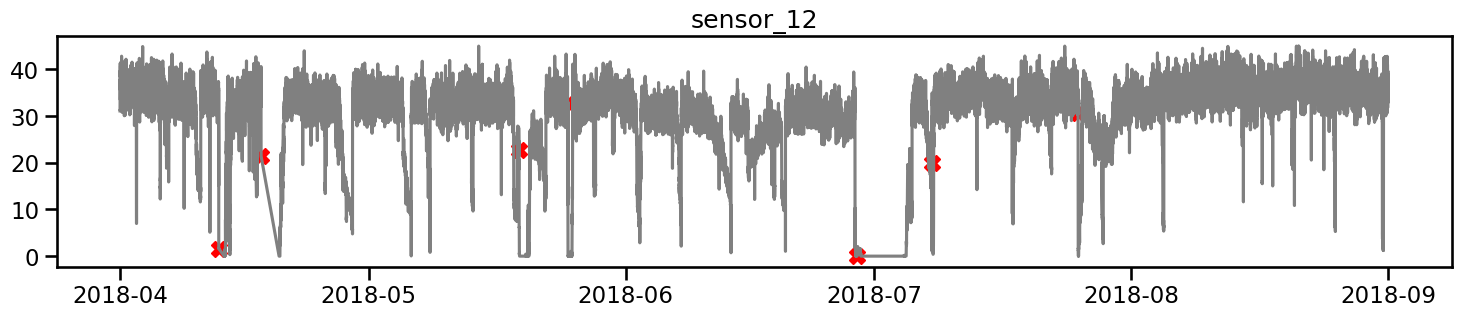

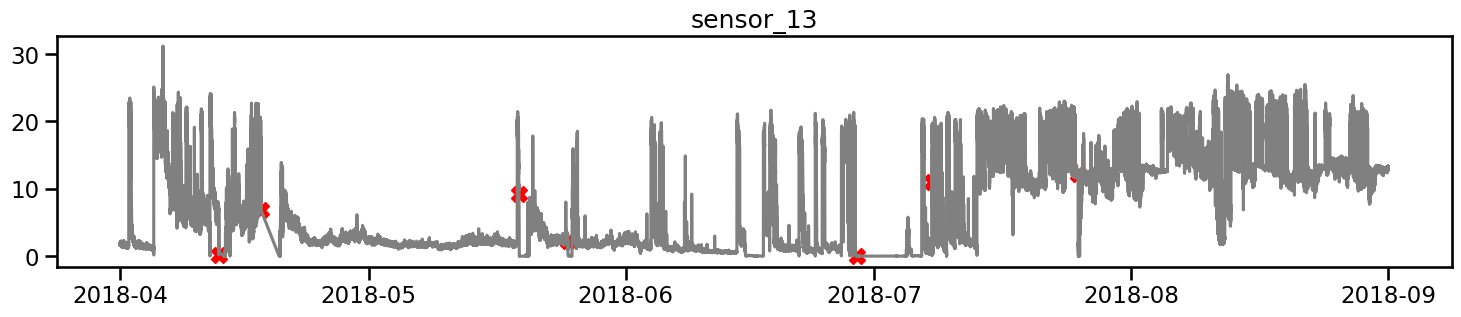

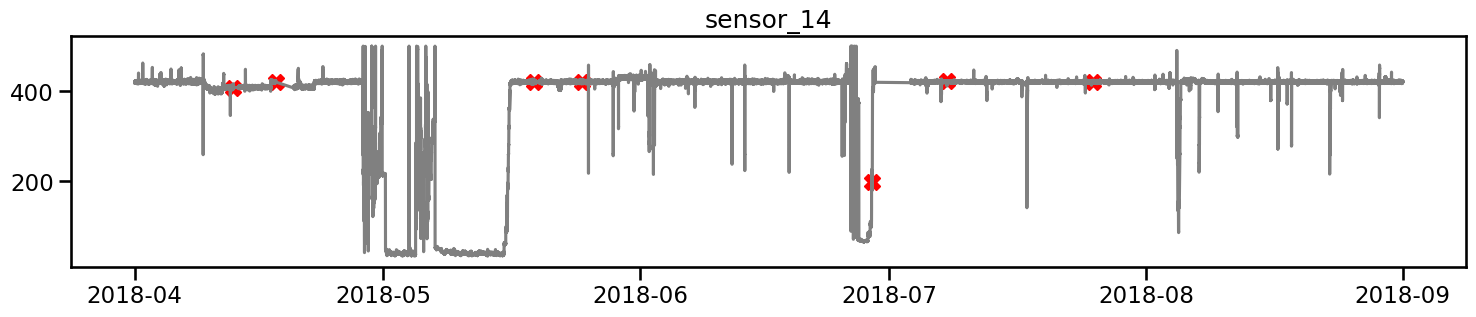

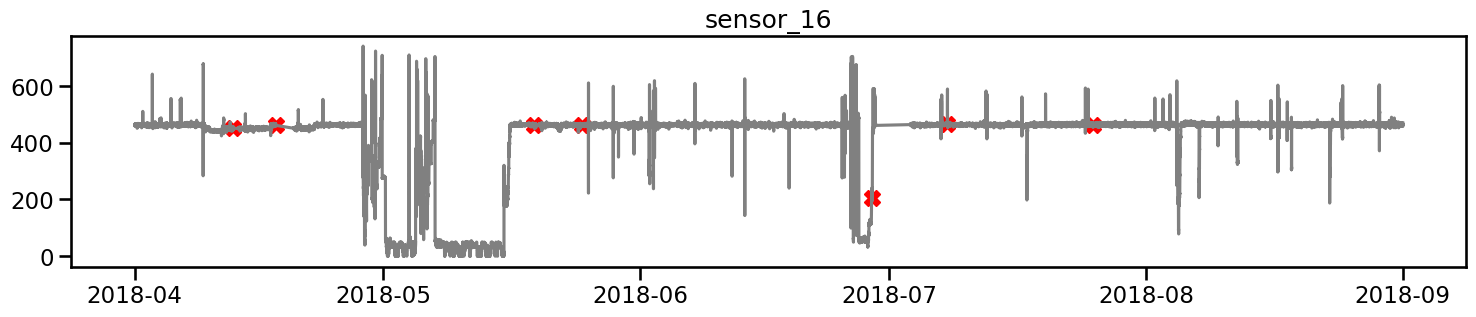

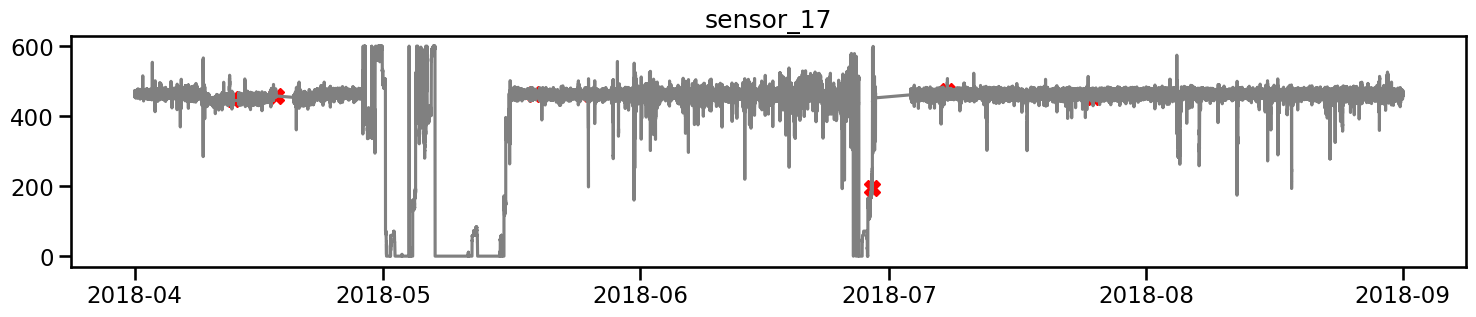

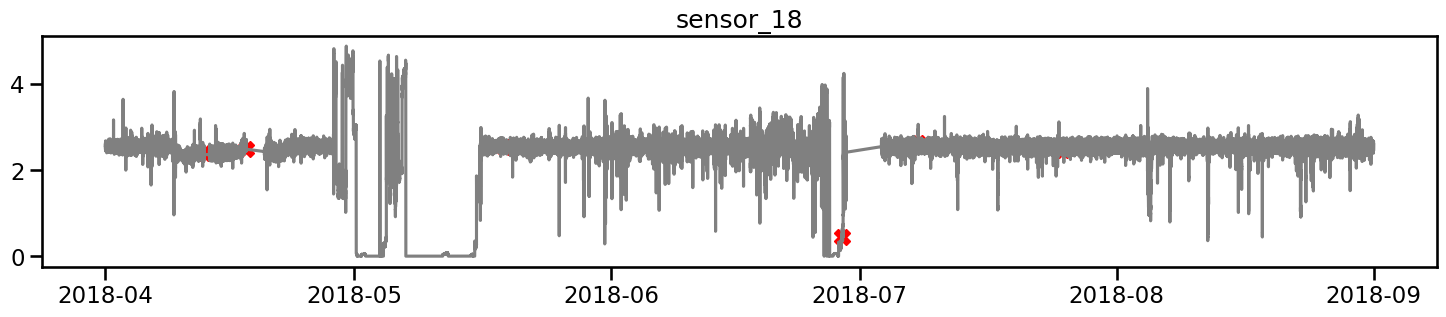

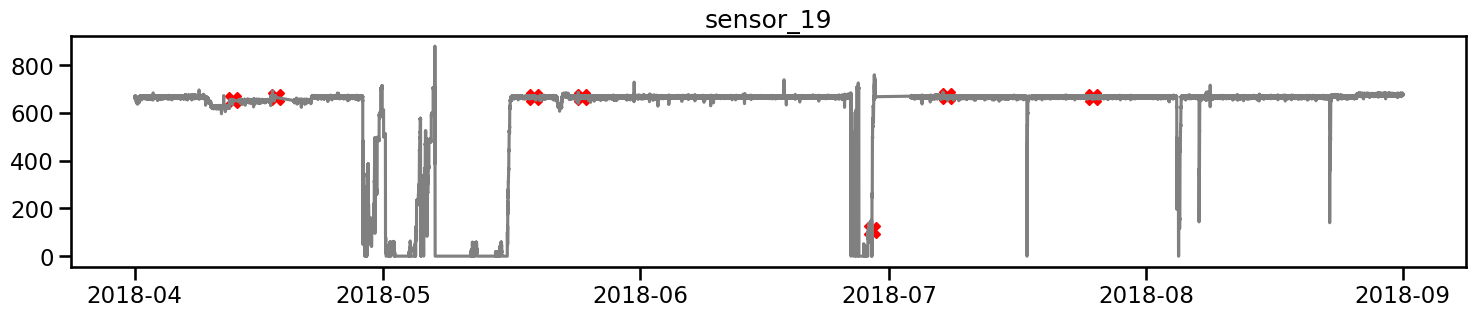

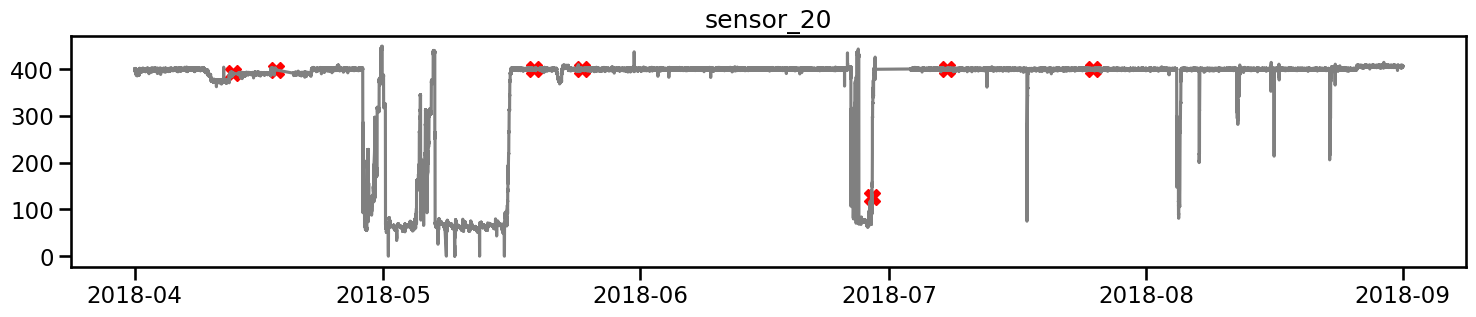

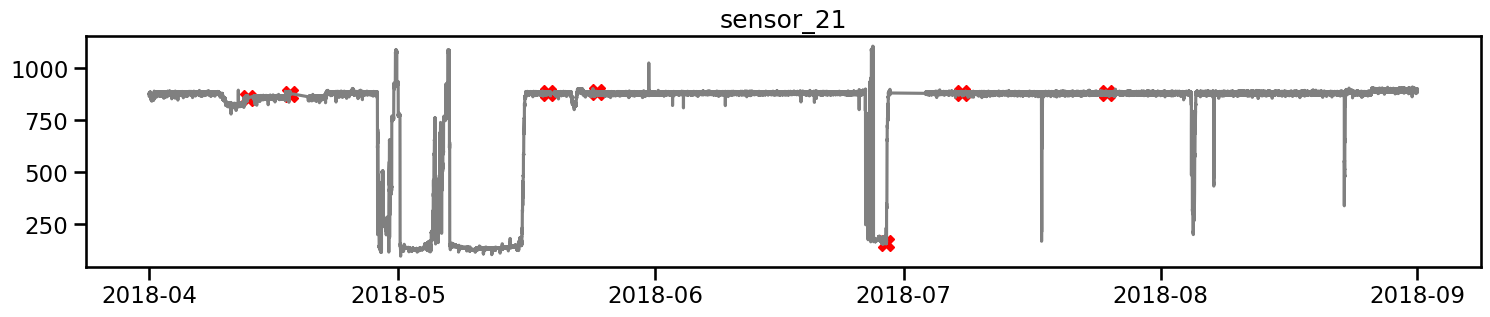

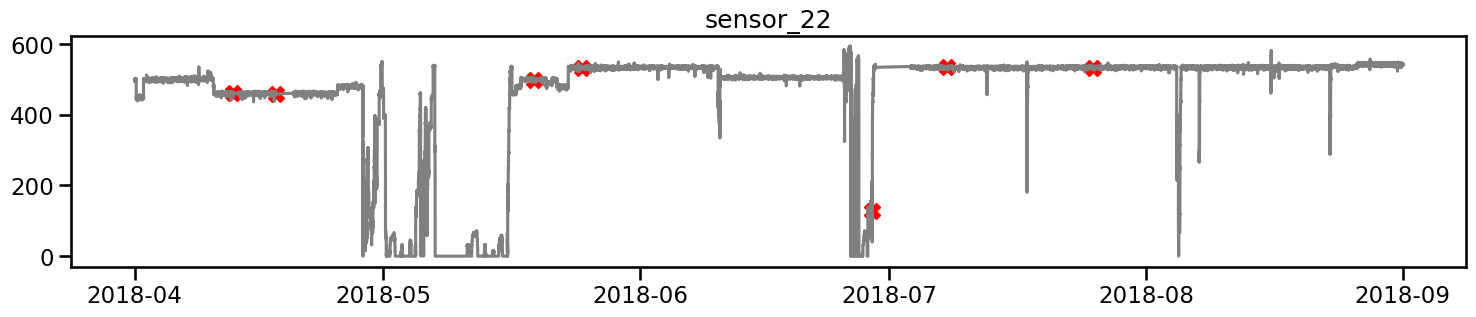

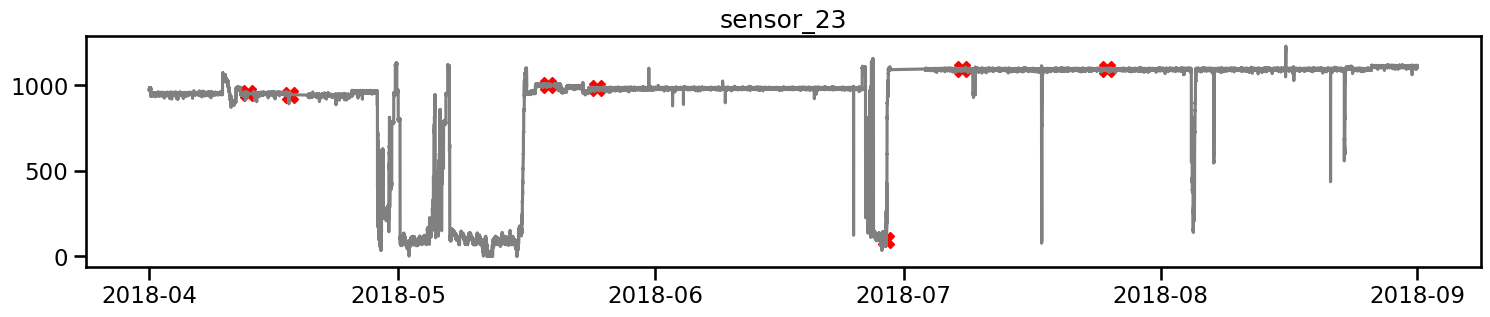

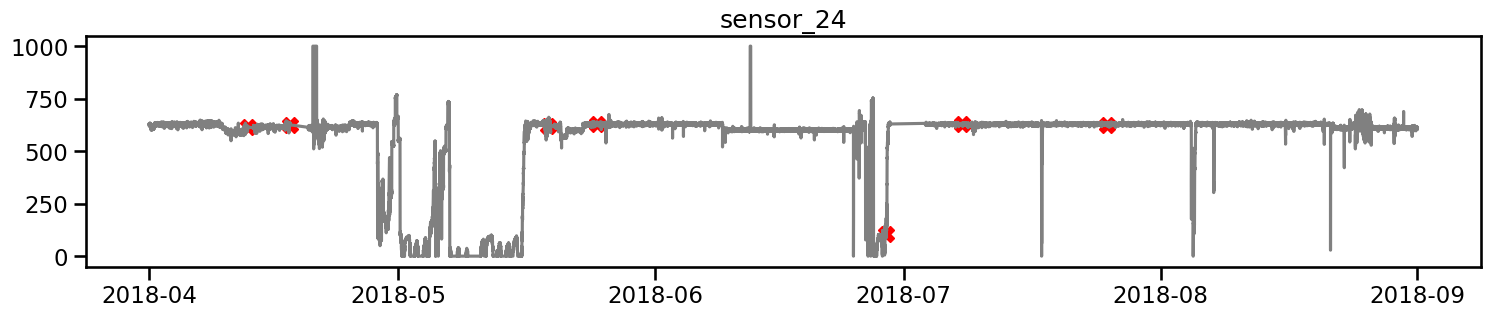

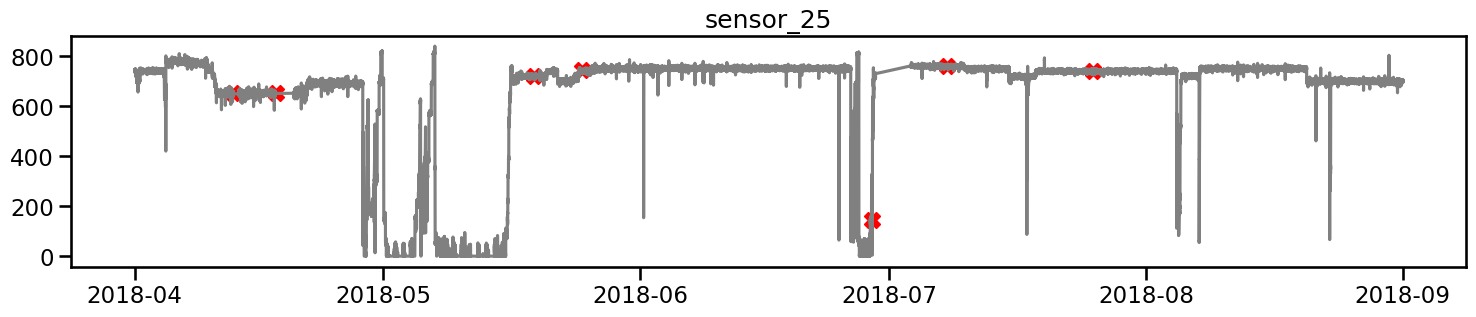

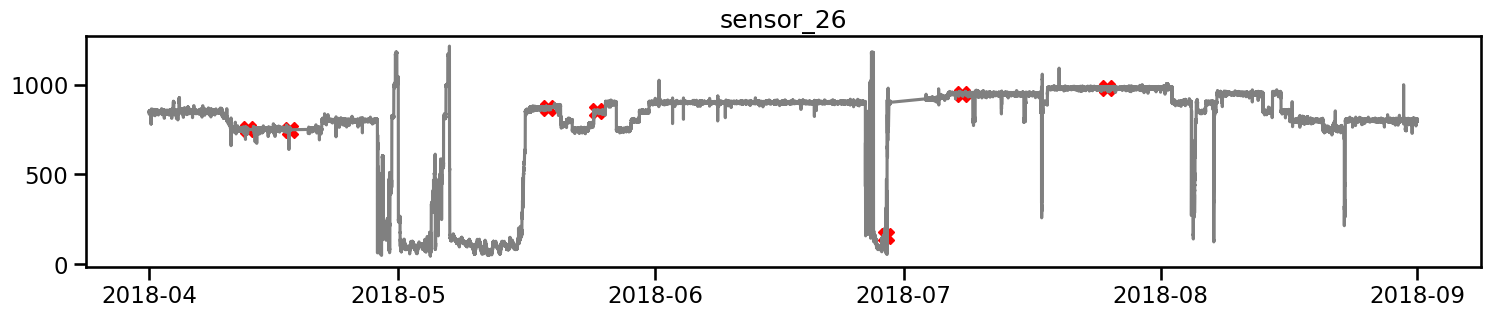

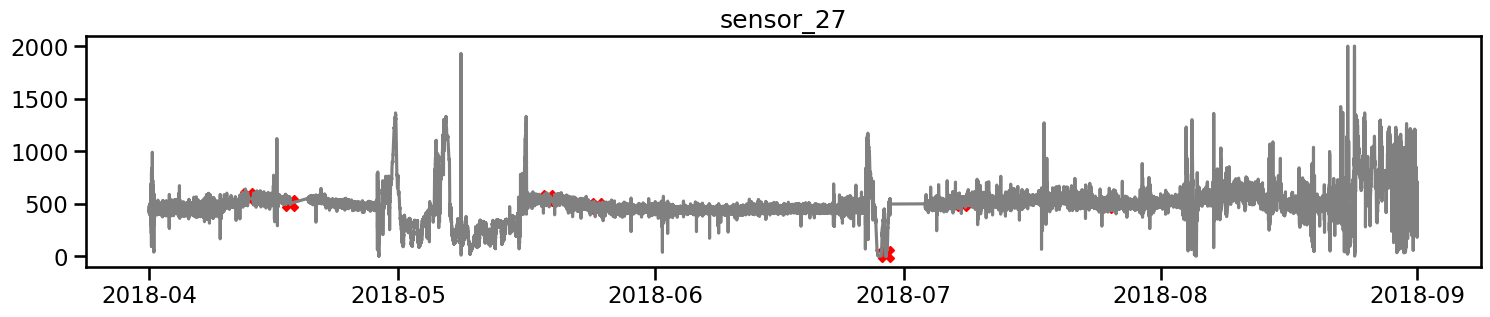

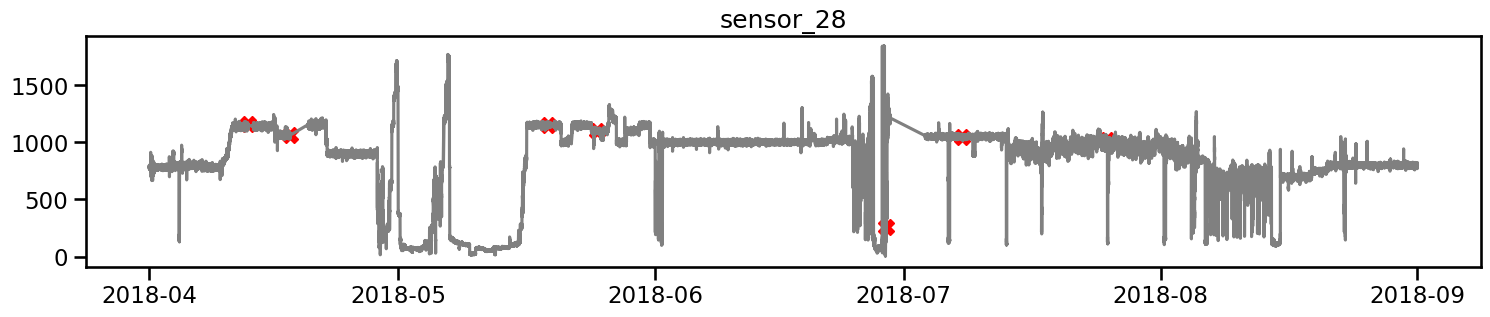

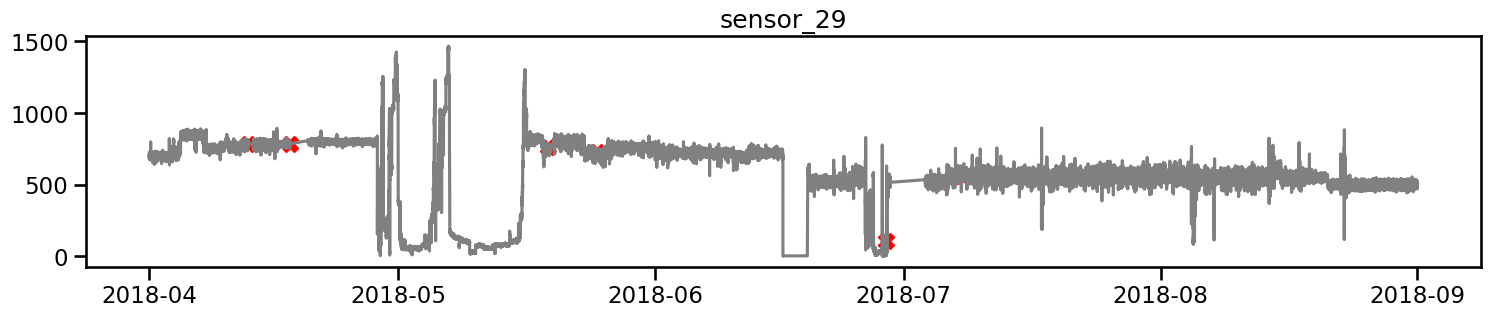

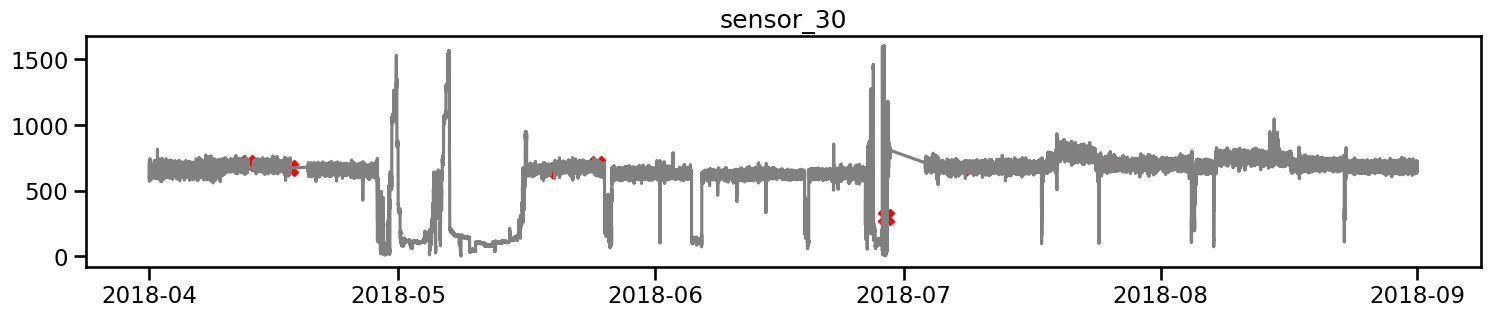

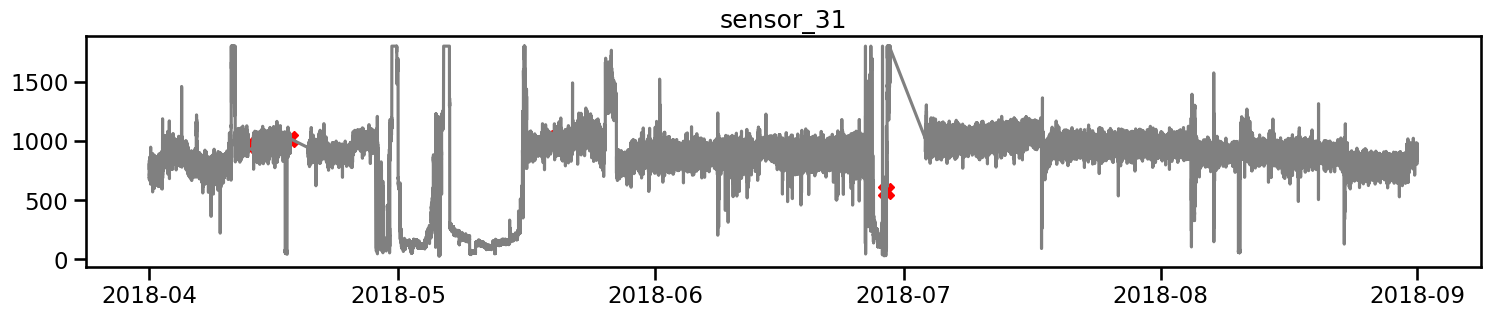

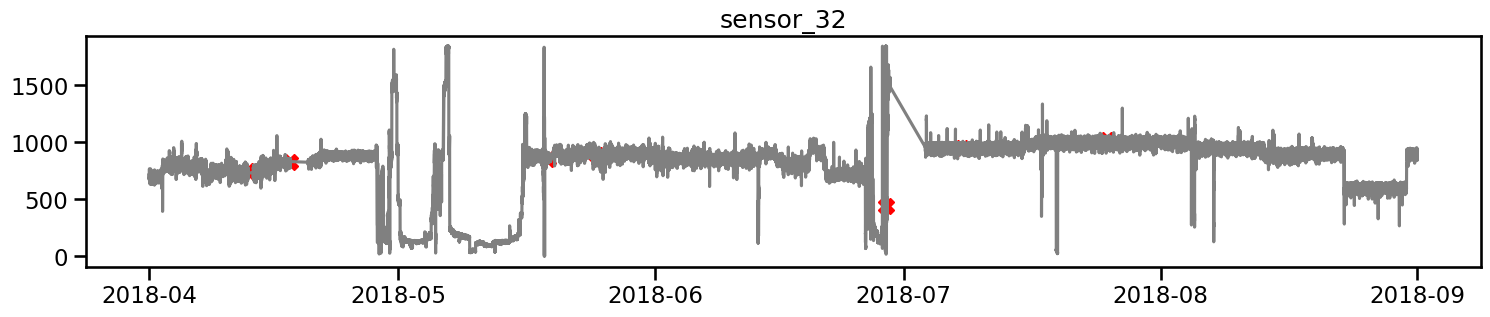

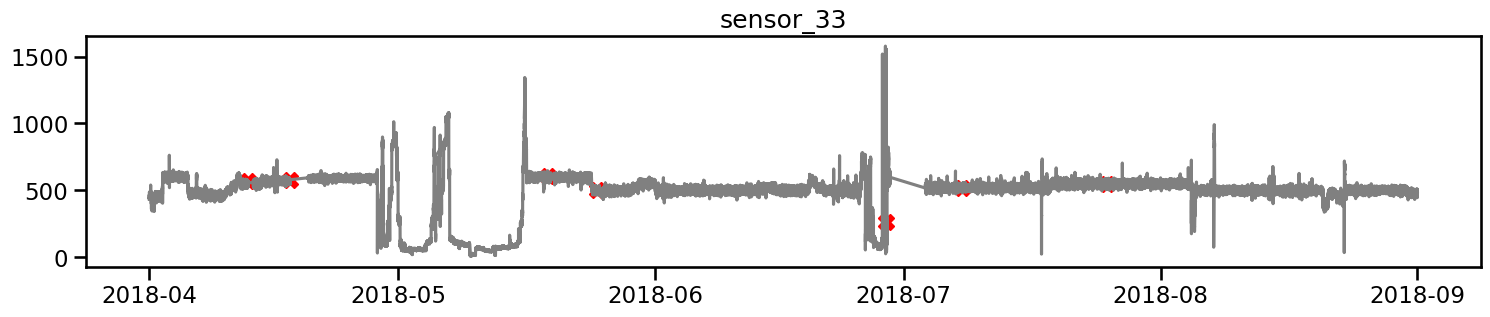

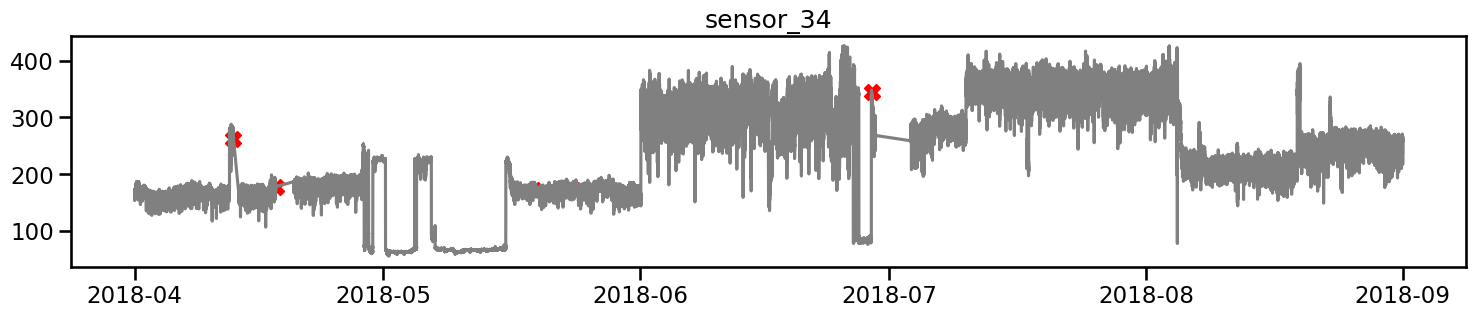

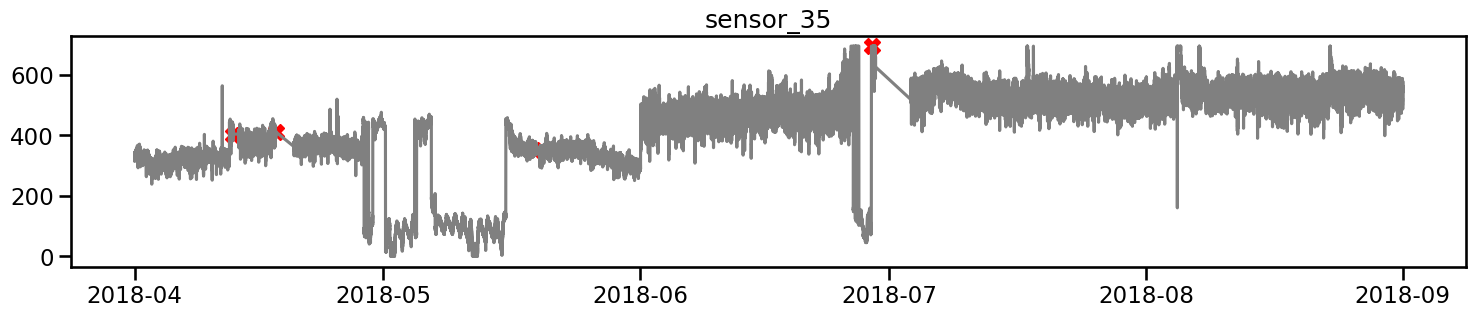

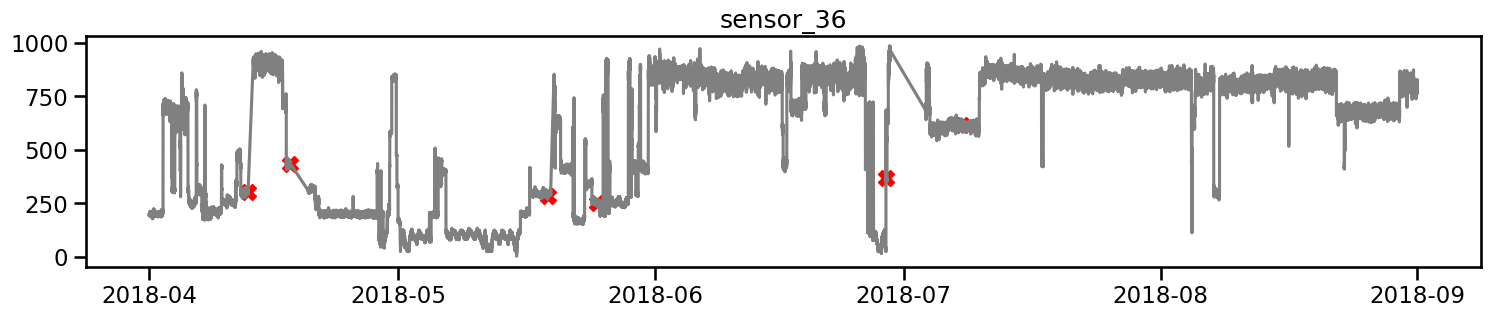

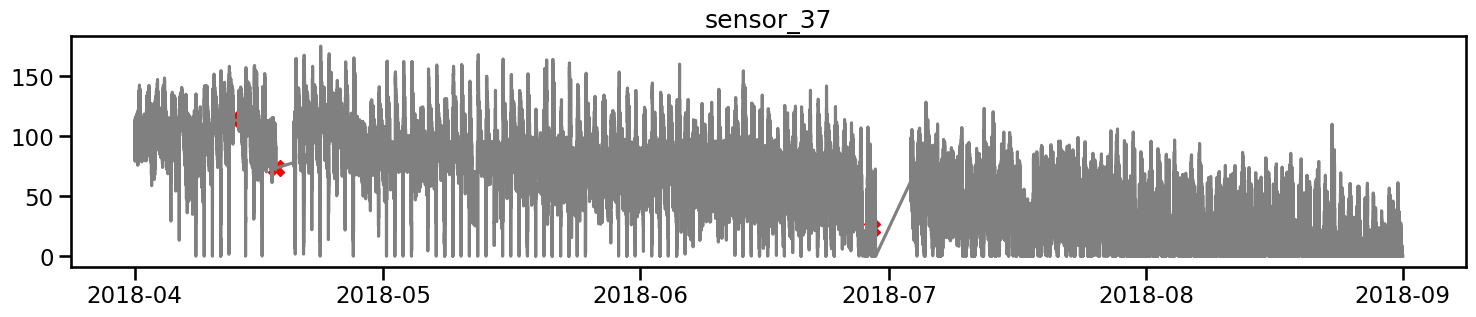

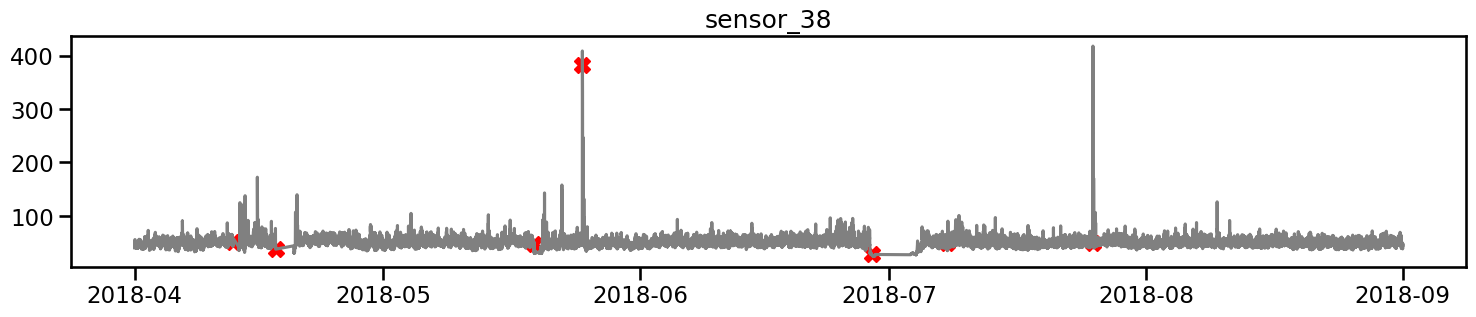

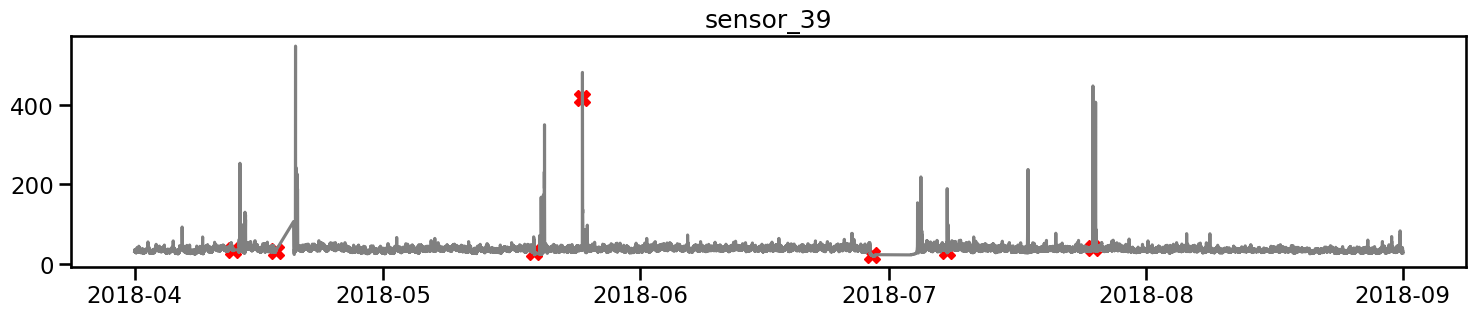

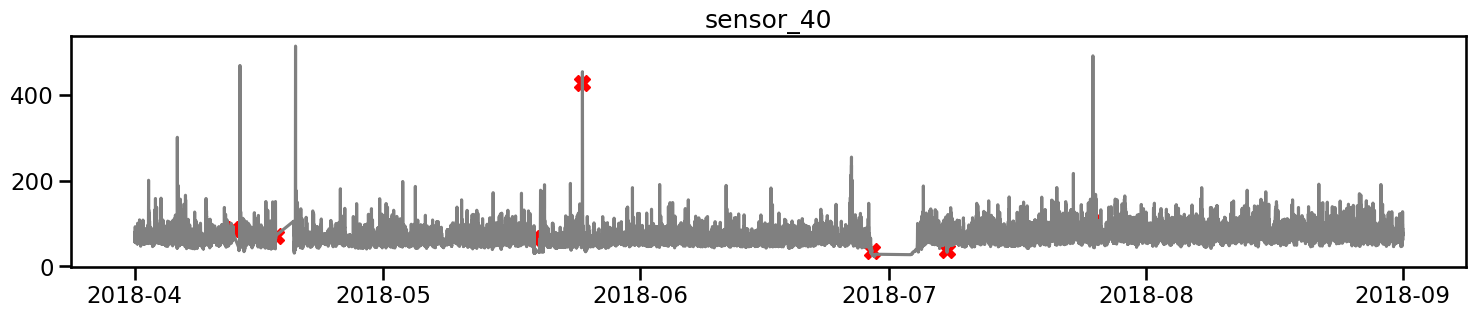

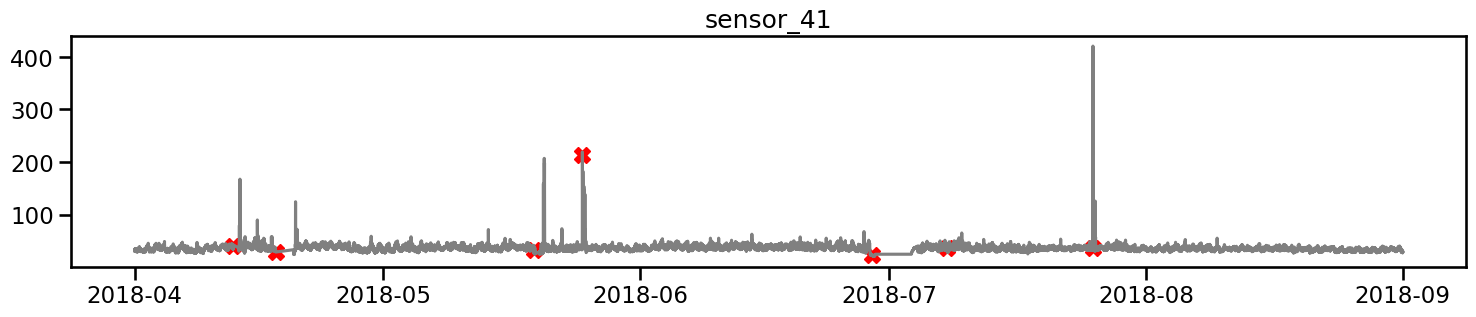

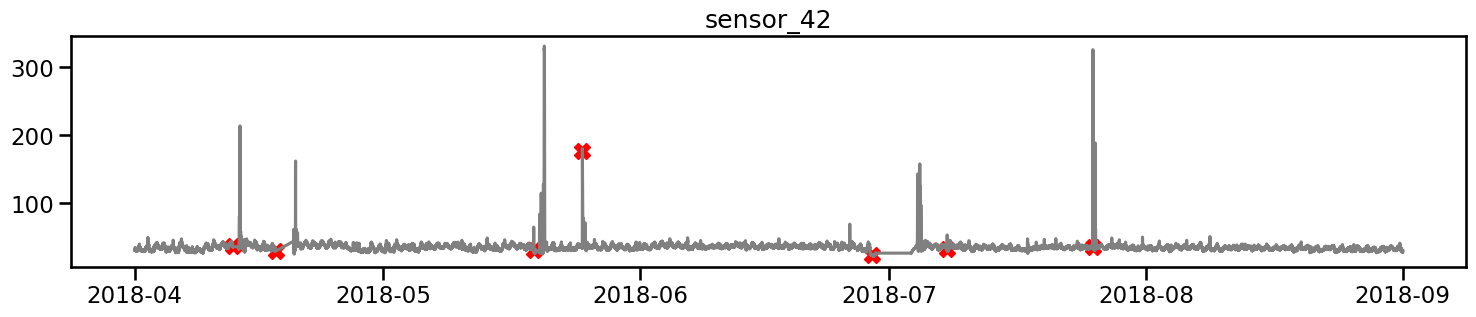

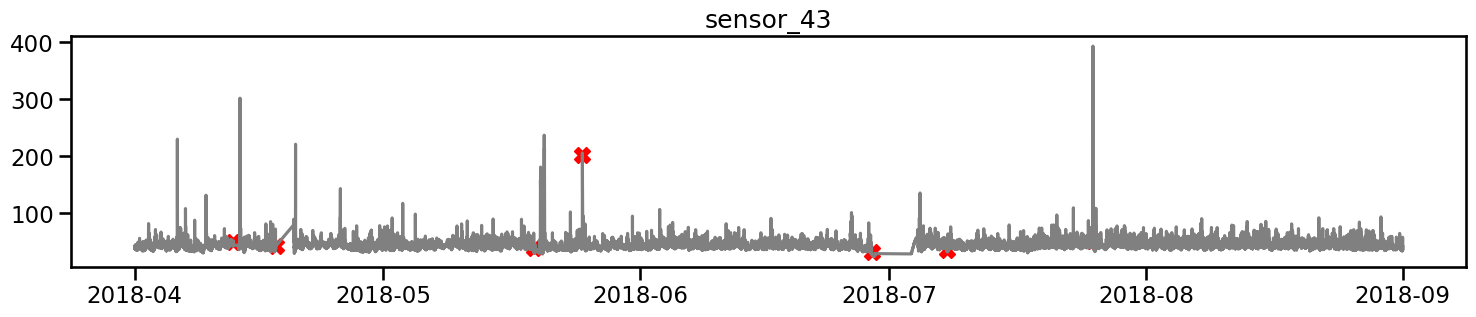

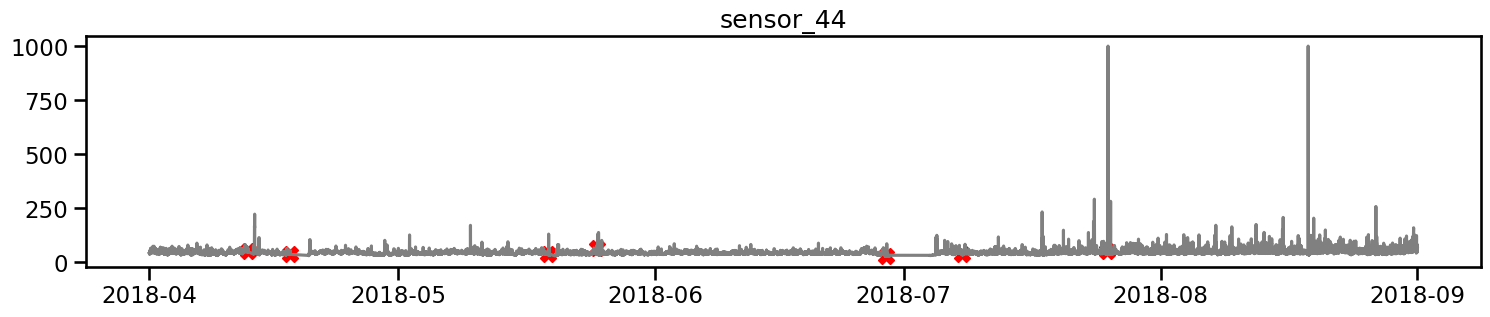

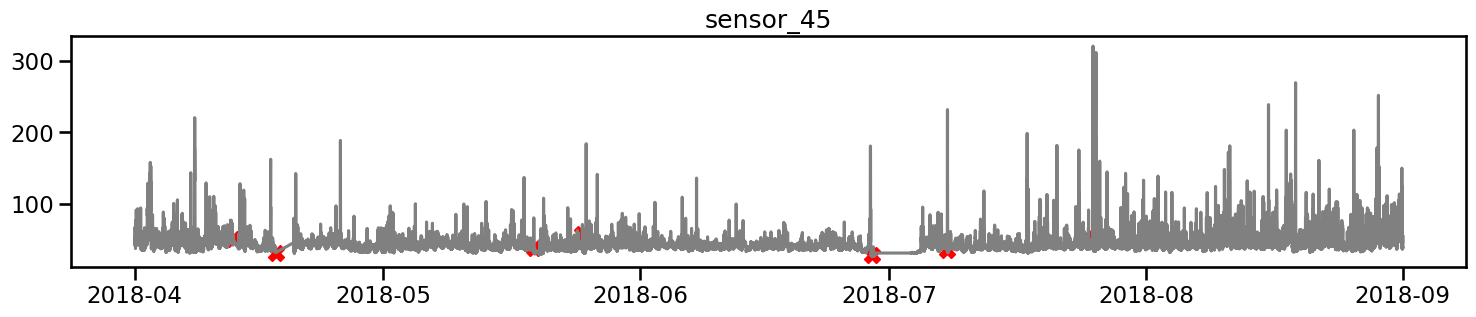

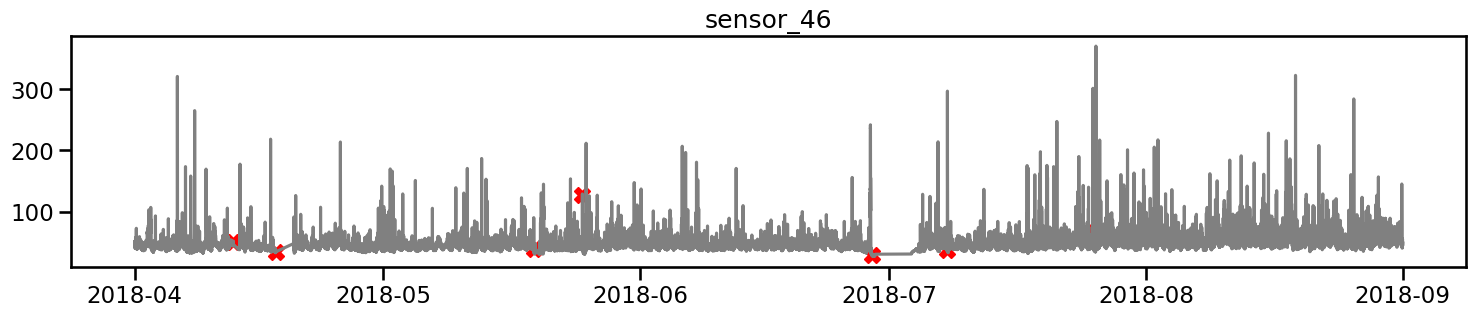

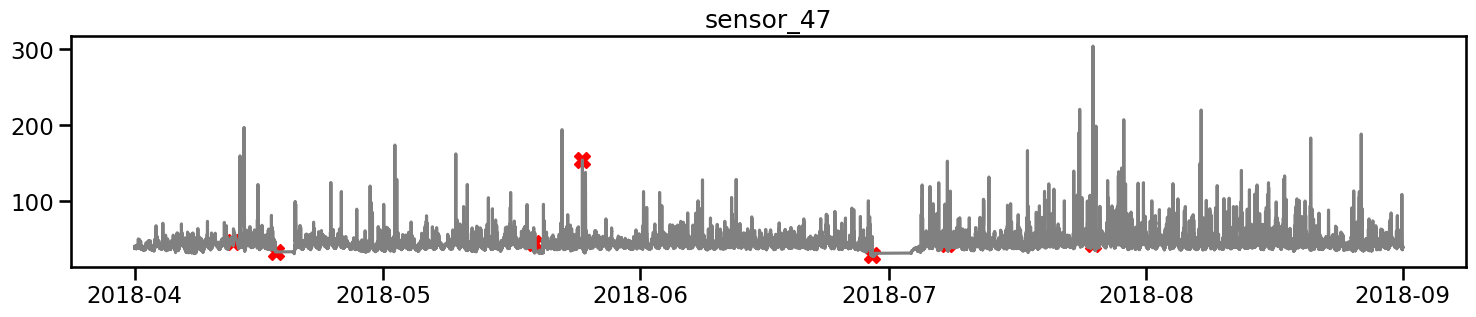

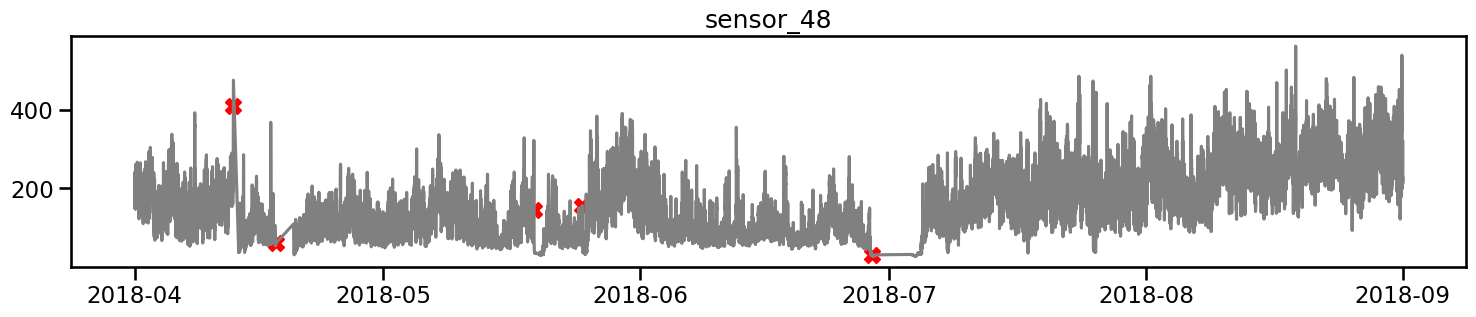

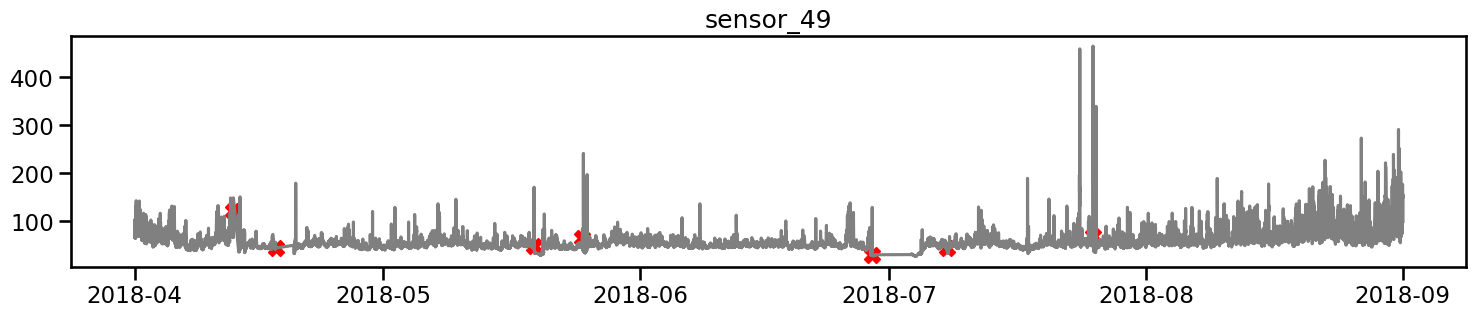

In [24]:
dfBroken = data[data['machine_status']=='BROKEN']
dfSensors = data.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(data[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

In [25]:
x = data[sensorNames]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

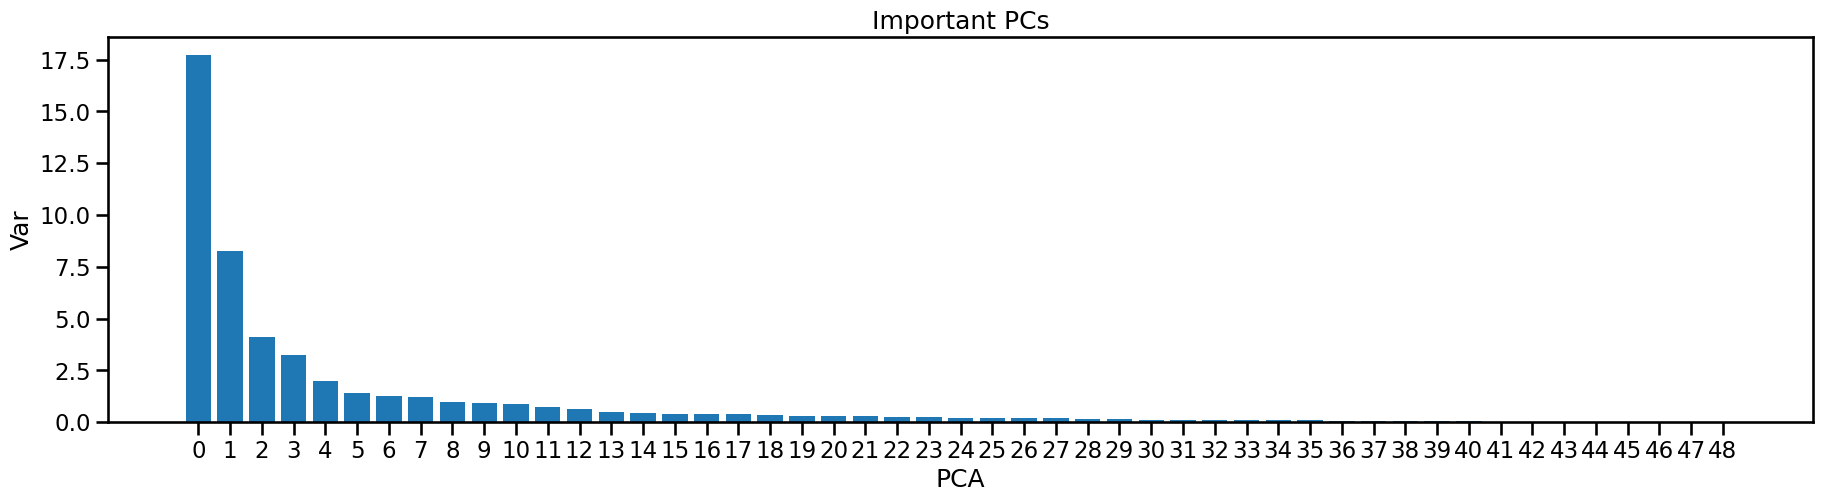

In [26]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features)
_ = plt.title("Important PCs")
plt.show()

In [27]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC0', 'PC1','PC2'])

In [29]:
data['PC0']=pd.Series(principalDf['PC0'].values, index=data.index)
data['PC1']=pd.Series(principalDf['PC1'].values, index=data.index)
data['PC2']=pd.Series(principalDf['PC2'].values, index=data.index)

In [31]:
#  for PC0
q1_pc1, q3_pc1 = data['PC0'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

#PC1
q1_pc2, q3_pc2 = data['PC1'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
#PC2
q1_pc3, q3_pc3 = data['PC2'].quantile([0.25, 0.75])
iqr_pc3 = q3_pc3 - q1_pc3
lower_pc3 = q1_pc3 - (1.5*iqr_pc3)
upper_pc3 = q3_pc3 + (1.5*iqr_pc3)

In [32]:
print(lower_pc1, upper_pc1)
print(lower_pc2, upper_pc2)
print(lower_pc3, upper_pc3)

-730.4507696432781 200.06052659505573
-676.2343253808872 601.6201069201852
-290.0340304303043 277.7730070822824


In [33]:
data['anomaly_pc1'] = ((data['PC0']>upper_pc1) | (data['PC0']<lower_pc1)).astype('int')
data['anomaly_pc2'] = ((data['PC1']>upper_pc2) | (data['PC1']<lower_pc2)).astype('int')
data['anomaly_pc3'] = ((data['PC2']>upper_pc3) | (data['PC2']<lower_pc3)).astype('int')

In [34]:
print(data['anomaly_pc1'].value_counts())
print(data['anomaly_pc2'].value_counts())
print(data['anomaly_pc3'].value_counts())

0    179656
1     29129
Name: anomaly_pc1, dtype: int64
0    205450
1      3335
Name: anomaly_pc2, dtype: int64
0    191987
1     16798
Name: anomaly_pc3, dtype: int64


In [35]:
outliers_pc1 = data.loc[(data['PC0']>upper_pc1) | (data['PC0']<lower_pc1), 'PC0']
outliers_pc2 = data.loc[(data['PC1']>upper_pc2) | (data['PC1']<lower_pc2), 'PC1']
outliers_pc3 = data.loc[(data['PC2']>upper_pc3) | (data['PC2']<lower_pc3), 'PC2']

In [36]:
print(len(outliers_pc1)/len(data))
print(len(outliers_pc2)/len(data))
print(len(outliers_pc3)/len(data))

0.1395167277342721
0.015973369734415786
0.08045597145388797


In [37]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = data.drop(['machine_status', 'PC0','PC1' ,'PC2', 'anomaly_pc1', 'anomaly_pc2', 'anomaly_pc3'], axis=1)
y = data['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature        Score
0   sensor_00  3349.321596
5   sensor_05  2586.622473
11  sensor_11  2572.767152


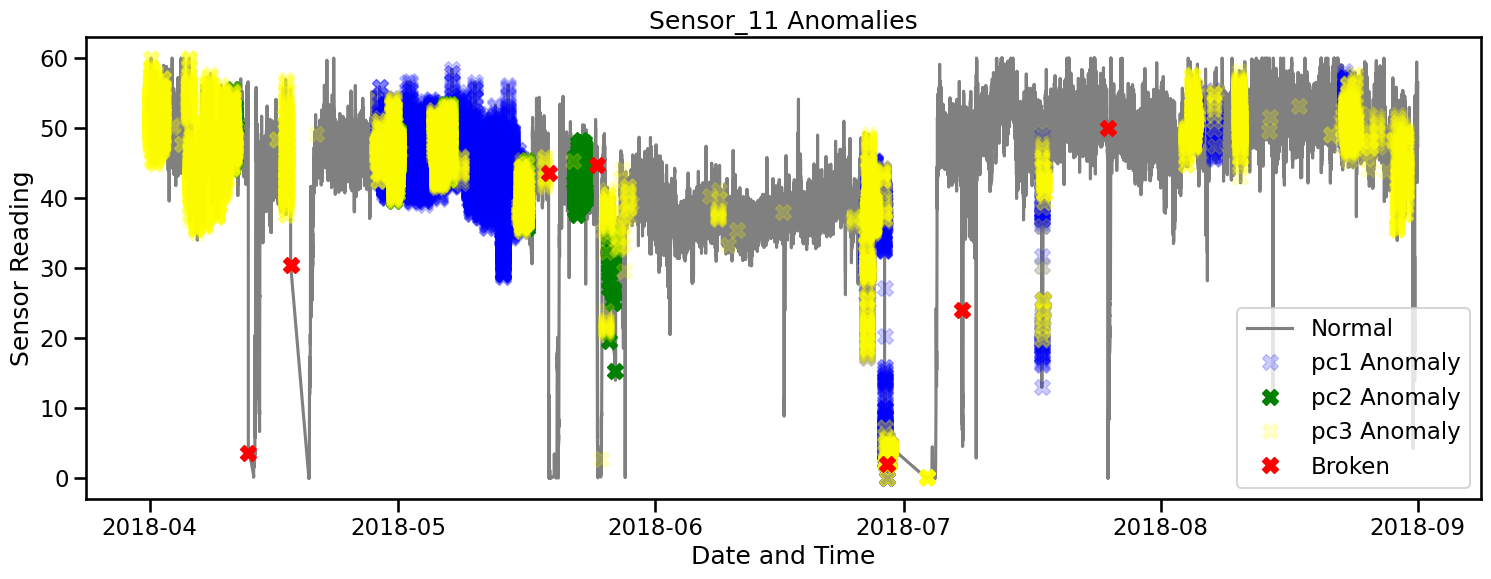

In [38]:
#PC3 ANOMALY on sensor_11 AND WHEN ACTUAL BREAK HAPPENED
a = data[data['anomaly_pc1'] == 1] #anomaly
b = data[data['anomaly_pc2'] == 1]
c = data[data['anomaly_pc3'] == 1]
_ = plt.figure(figsize=(18,6))
_ = plt.plot(data['sensor_11'], color='grey', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='blue', markersize=12, label='pc1 Anomaly', alpha = 0.2)
_ = plt.plot(b['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='pc2 Anomaly')
_ = plt.plot(c['sensor_11'], linestyle='none', marker='X', color='yellow', markersize=12, label='pc3 Anomaly', alpha=0.2)
_ = plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

C:\Users\Laman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


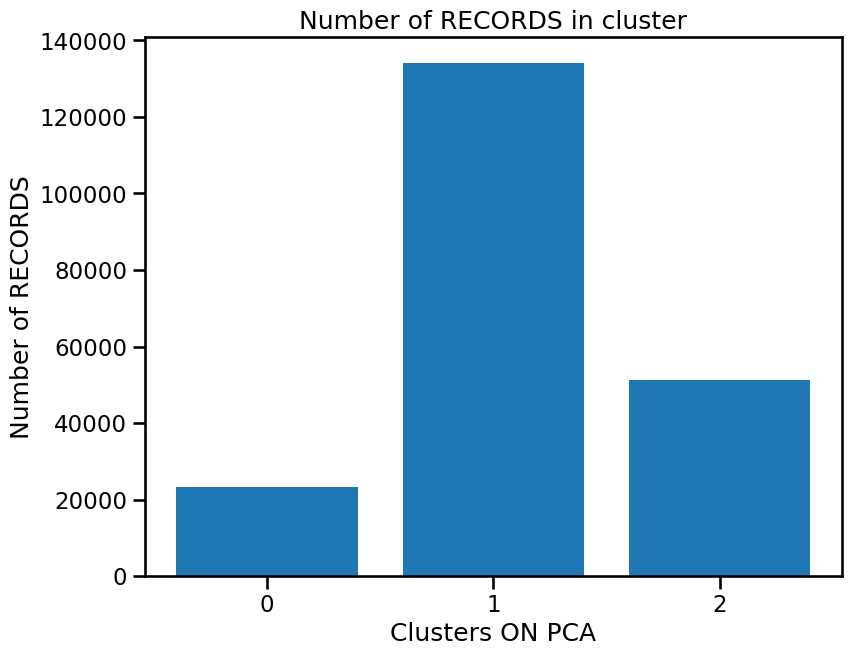

In [40]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters ON PCA')
_ = plt.ylabel('Number of RECORDS')
_ = plt.title('Number of RECORDS in cluster')
plt.show()

In [41]:
principalDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208785 entries, 0 to 208784
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC0     208785 non-null  float64
 1   PC1     208785 non-null  float64
 2   PC2     208785 non-null  float64
dtypes: float64(3)
memory usage: 4.8 MB


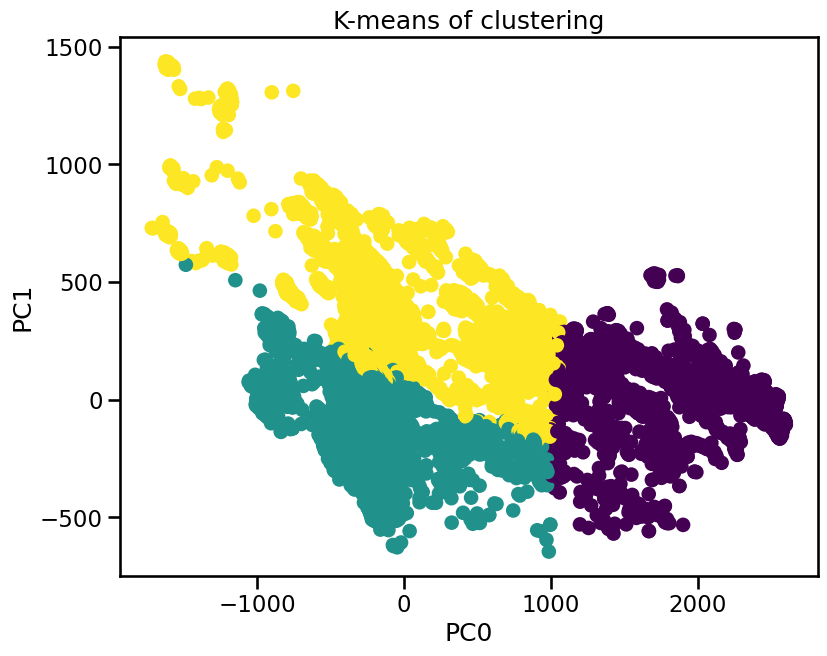

In [42]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC0'], principalDf['PC1'], c=labels)
_ = plt.xlabel('PC0')
_ = plt.ylabel('PC1')
_ = plt.title('K-means of clustering')
plt.show()

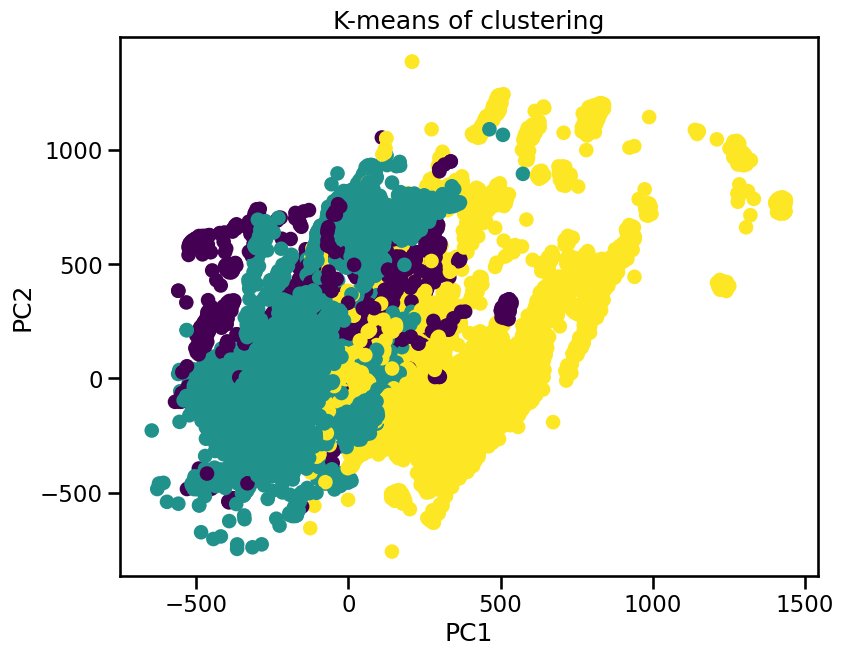

In [43]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=labels)
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.title('K-means of clustering')
plt.show()

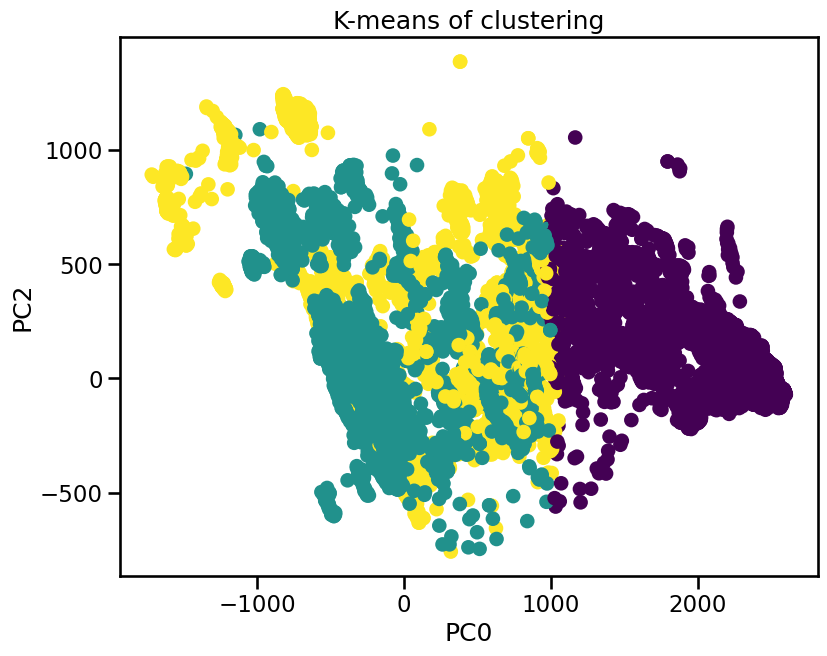

In [44]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC0'], principalDf['PC2'], c=labels)
_ = plt.xlabel('PC0')
_ = plt.ylabel('PC2')
_ = plt.title('K-means of clustering')
plt.show()

In [45]:
from mpl_toolkits import mplot3d


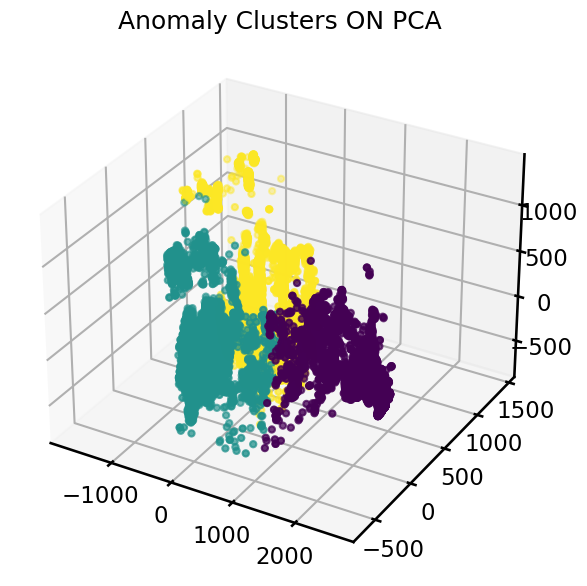

In [46]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(principalDf['PC0'], principalDf['PC1'], principalDf['PC2'], c=labels)
plt.title("Anomaly Clusters ON PCA")
 
# show plot
plt.show()

In [47]:
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [48]:
distance = getDistanceByPoint(principalDf, kmeans)


In [49]:
outliers_fraction = 0.11
number_of_outliers = int(outliers_fraction*len(distance))

In [50]:
threshold = distance.nlargest(number_of_outliers).min()


In [51]:
#(0:normal, 1:anomaly) 
principalDf['anomalyDist'] = (distance >= threshold).astype(int)

In [52]:
principalDf['anomalyDist'].value_counts()


0    185819
1     22966
Name: anomalyDist, dtype: int64

In [54]:
data['anomalyDist'] = pd.Series(principalDf['anomalyDist'].values, index=data.index)


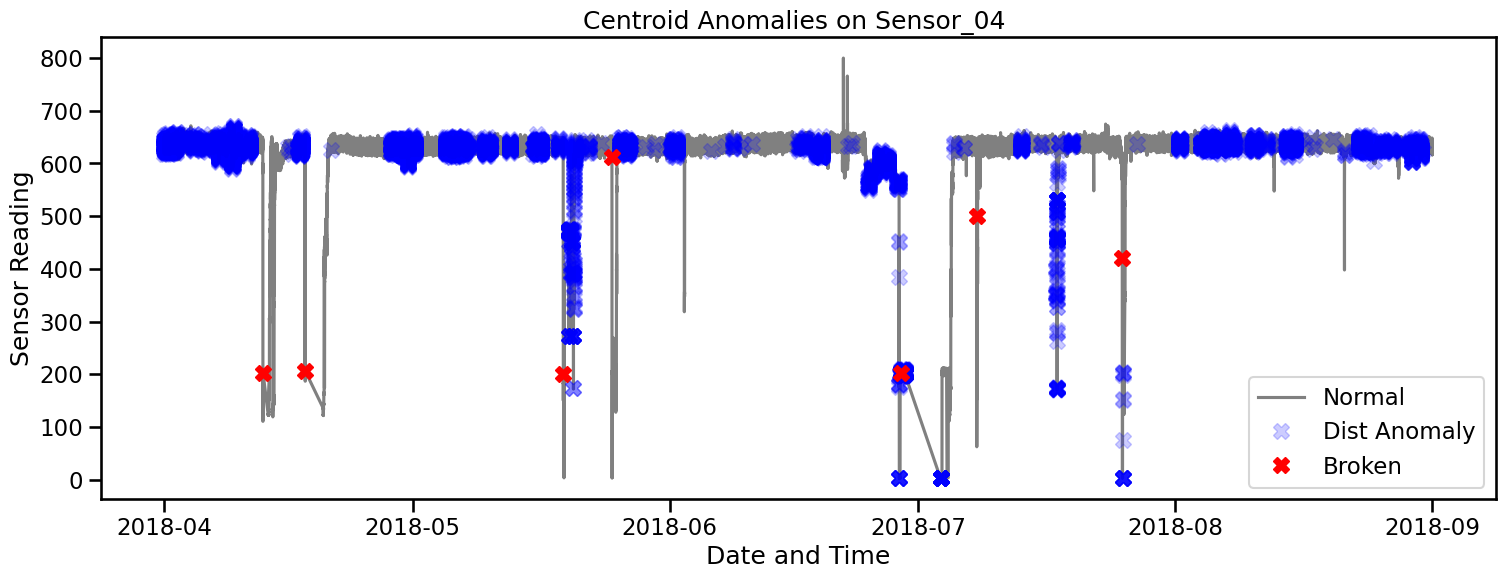

In [55]:
a = data[data['anomalyDist'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(data['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Dist Anomaly', alpha= 0.2)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Centroid Anomalies on Sensor_04 ')
_ = plt.legend(loc='best')
plt.show();

In [57]:
data[data['anomalyDist']==1]['machine_status'].value_counts()

NORMAL        22112
RECOVERING      853
BROKEN            1
Name: machine_status, dtype: int64

In [58]:
data['machine_status'].value_counts()


NORMAL        205067
RECOVERING      3711
BROKEN             7
Name: machine_status, dtype: int64

In [60]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.11 ## why
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomalyForest'] = pd.Series(model.predict(principalDf.values)) ### here -1 is anomaly

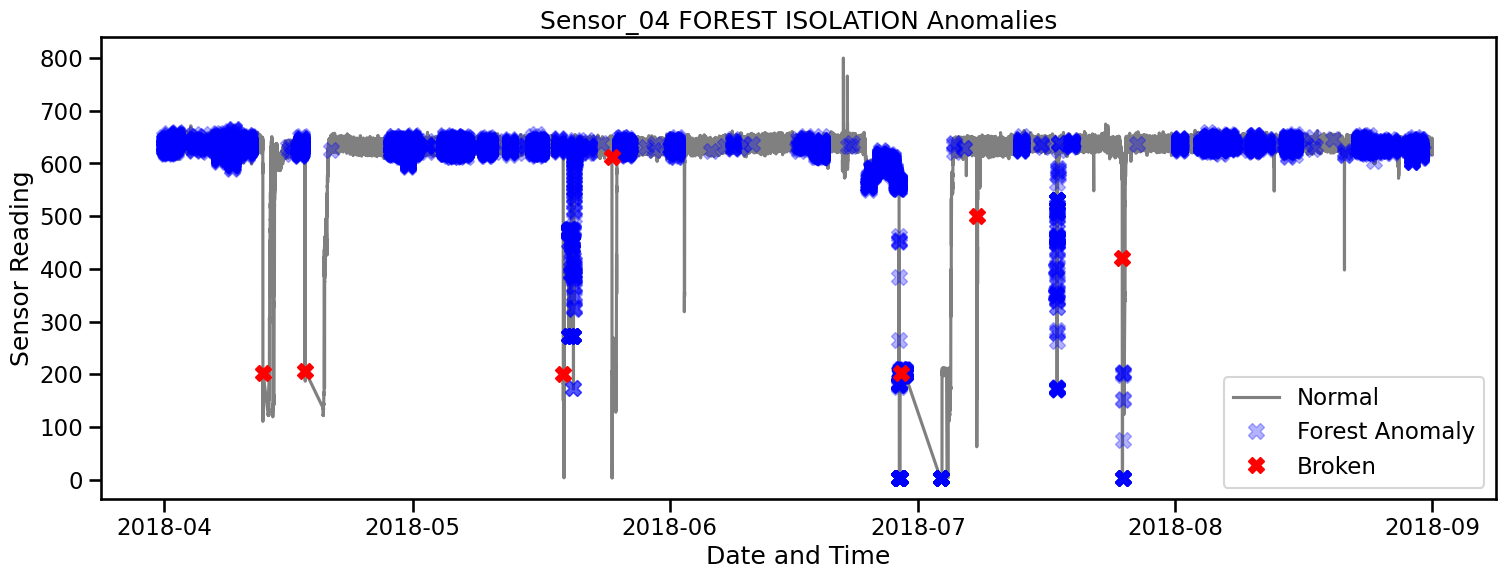

In [61]:
data['anomalyForest'] = pd.Series(principalDf['anomalyForest'].values, index=data.index)
a = data.loc[data['anomalyForest'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(data['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Forest Anomaly', alpha=0.3)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 FOREST ISOLATION Anomalies')
_ = plt.legend(loc='best')
plt.show();


In [62]:
data['anomalyForest'].value_counts()


 1    185819
-1     22966
Name: anomalyForest, dtype: int64

In [63]:
data[data['anomalyForest']==1]['machine_status'].value_counts()


NORMAL        182955
RECOVERING      2858
BROKEN             6
Name: machine_status, dtype: int64

In [64]:
data['machine_status'].value_counts()


NORMAL        205067
RECOVERING      3711
BROKEN             7
Name: machine_status, dtype: int64